# Metricas, Generación y Pre-Post Pipeline para TDZDD

Por: Carlos Olguin - MSC

Diversos graficos se plantean a continuaciòn, revisar en detalle cada uno considerando los datos guardados en **test.cpp**, notar que el limite teorico por nodos son 16bytes dado que consideramos **ARITY=2** y la clase **Node** la cual almacena sus dos hijos en 8 bytes cada uno, de ahi la derivacion (Mas detalle revisar "..\TdZdd\include\tdzdd\dd\Node.hpp" la clase **Node**)

Leyendo: resultados_test/memoria_log.csv


C:\Users\carlo\AppData\Local\Temp\ipykernel_30088\3083872039.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


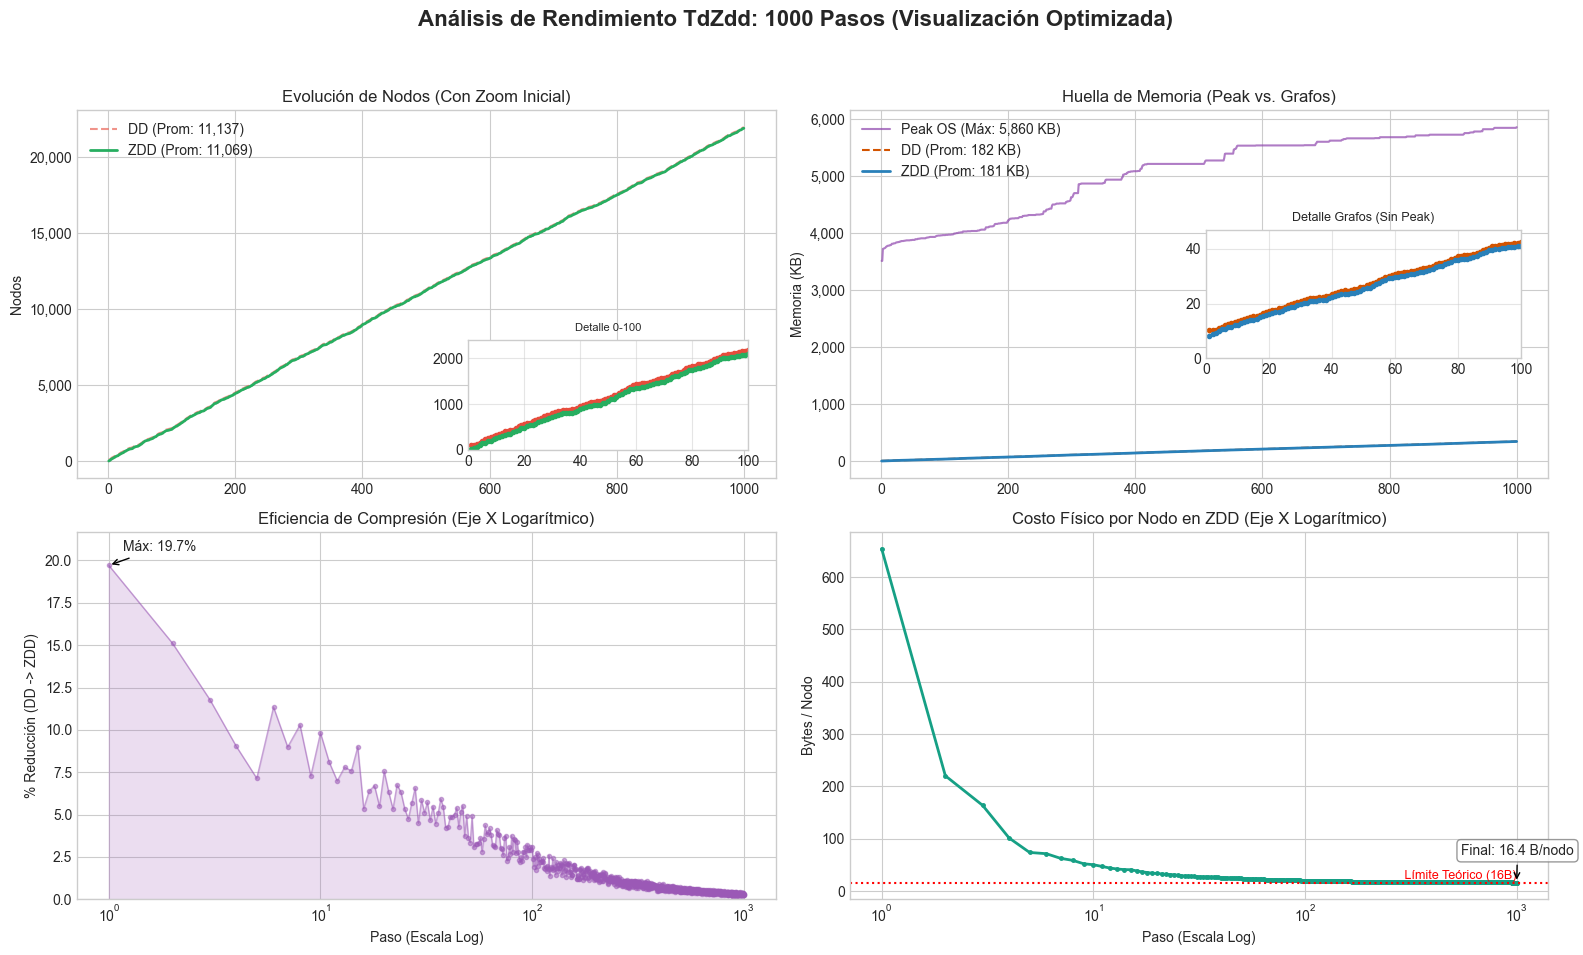

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os

# Path archivos
OUTPUT_DIR = "resultados_test/"
CSV_FILE = "memoria_log.csv"
CSV_PATH = os.path.join(OUTPUT_DIR, CSV_FILE)

if not os.path.exists(CSV_PATH):
    print(f"Error: No se encontró {CSV_PATH}")
    exit()

print(f"Leyendo: {CSV_PATH}")
df = pd.read_csv(CSV_PATH)

# Cálculos
df['Reduccion_Pct'] = ((df['Bytes_DD'] - df['Bytes_ZDD']) / df['Bytes_DD']) * 100
df['Bytes_Por_Nodo'] = df['Bytes_ZDD'] / df['Nodos_ZDD']

# Estilo
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('ggplot')

C_DD   = '#e74c3c'  
C_ZDD  = '#27ae60'  
C_MEM_DD = '#d35400' 
C_MEM_Z = '#2980b9' 
C_PEAK  = '#8e44ad' 
C_EFF   = '#9b59b6' 
C_DENS  = '#16a085' 

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(f'Análisis de Rendimiento TdZdd: {len(df)} Pasos (Visualización Optimizada)', fontsize=16, fontweight='bold')
fmt_miles = ticker.StrMethodFormatter('{x:,.0f}')

# Calcular rango del zoom, se plantean minimo 100 conjuntos (pasos) o 50% si tiene menos
pasos = int(min(100, len(df) * 0.5))

# Promedios
avg_nodos_dd = df['Nodos_DD'].mean()
avg_nodos_zdd = df['Nodos_ZDD'].mean()
avg_mem_dd = df['KB_DD'].mean()
avg_mem_zdd = df['KB_ZDD'].mean()
max_peak = df['Peak_Mem_KB'].max()

# EVOLUCIÓN ESTRUCTURAL, OSEA LOS NODOS (Con ZOOM INSET)
ax1 = axs[0, 0]
ax1.plot(df['Paso'], df['Nodos_DD'], label=f'DD (Prom: {avg_nodos_dd:,.0f})', color=C_DD, linestyle='--', alpha=0.6)
ax1.plot(df['Paso'], df['Nodos_ZDD'], label=f'ZDD (Prom: {avg_nodos_zdd:,.0f})', color=C_ZDD, linewidth=2)
ax1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)

ax1.set_title('Evolución de Nodos (Con Zoom Inicial)', fontsize=12)
ax1.set_ylabel('Nodos')
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(fmt_miles)

axins1 = inset_axes(ax1, width="40%", height="30%", loc='lower right', borderpad=2)
axins1.plot(df['Paso'], df['Nodos_DD'], color=C_DD, linestyle='--', marker='.')
axins1.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, marker='.')
axins1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
axins1.set_xlim(0, pasos) 
axins1.set_ylim(0, df['Nodos_DD'].iloc[pasos] * 1.1) 
axins1.grid(True, alpha=0.5)
axins1.set_title(f"Detalle 0-{pasos}", fontsize=8)

# CONSUMO MEMORIA (Con ZOOM INSET)
ax2 = axs[0, 1]

ax2.plot(df['Paso'], df['Peak_Mem_KB'], label=f'Peak OS (Máx: {max_peak:,.0f} KB)', 
         color=C_PEAK, linestyle='-', linewidth=1.5, alpha=0.7)
ax2.plot(df['Paso'], df['KB_DD'], label=f'DD (Prom: {avg_mem_dd:,.0f} KB)', color=C_MEM_DD, linestyle='--')
ax2.plot(df['Paso'], df['KB_ZDD'], label=f'ZDD (Prom: {avg_mem_zdd:,.0f} KB)', color=C_MEM_Z, linewidth=2)

ax2.set_title('Huella de Memoria (Peak vs. Grafos)', fontsize=12)
ax2.set_ylabel('Memoria (KB)')
ax2.legend(loc='upper left')
ax2.yaxis.set_major_formatter(fmt_miles)

axins2 = inset_axes(ax2, width="45%", height="35%", loc='center right', borderpad=2)
axins2.plot(df['Paso'], df['KB_DD'], color=C_MEM_DD, linestyle='--', marker='.', label='DD')
axins2.plot(df['Paso'], df['KB_ZDD'], color=C_MEM_Z, marker='.', label='ZDD')
axins2.fill_between(df['Paso'], df['KB_DD'], df['KB_ZDD'], color=C_MEM_DD, alpha=0.2)

axins2.set_xlim(0, pasos)
ymax_zoom = df['KB_DD'].iloc[pasos] * 1.1 
axins2.set_ylim(0, ymax_zoom)
axins2.grid(True, alpha=0.5)
axins2.set_title(f"Detalle Grafos (Sin Peak)", fontsize=9)

# EFICIENCIA (EJE X LOGARÍTMICO Para visualizacion)
ax3 = axs[1, 0]
ax3.semilogx(df['Paso'], df['Reduccion_Pct'], color=C_EFF, linewidth=1, marker='o', markersize=3, alpha=0.5)
ax3.fill_between(df['Paso'], df['Reduccion_Pct'], color=C_EFF, alpha=0.2)

ax3.set_title('Eficiencia de Compresión (Eje X Logarítmico)', fontsize=12)
ax3.set_ylabel('% Reducción (DD -> ZDD)')
ax3.set_xlabel('Paso (Escala Log)')
ax3.set_ylim(0, max(df['Reduccion_Pct']) * 1.1)

max_eff = df['Reduccion_Pct'].max()
max_eff_idx = df['Reduccion_Pct'].idxmax()
ax3.annotate(f'Máx: {max_eff:.1f}%', 
             xy=(df['Paso'][max_eff_idx], max_eff), 
             xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'))

# DENSIDAD (EJE X LOGARÍTMICO Para visualizacion)
ax4 = axs[1, 1]
ax4.semilogx(df['Paso'], df['Bytes_Por_Nodo'], color=C_DENS, linewidth=2, marker='.', markersize=5)

ax4.axhline(y=16, color='r', linestyle=':', label='Payload (16B)')
ax4.text(df['Paso'].iloc[-1], 16.5, ' Límite Teórico (16B)', color='r', va='bottom', ha='right', fontsize=9)

ax4.set_title('Costo Físico por Nodo en ZDD (Eje X Logarítmico)', fontsize=12)
ax4.set_ylabel('Bytes / Nodo')
ax4.set_xlabel('Paso (Escala Log)')

val_final = df['Bytes_Por_Nodo'].iloc[-1]
ax4.annotate(f'Final: {val_final:.1f} B/nodo', 
             xy=(df['Paso'].iloc[-1], val_final), 
             xytext=(-40, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Recordar la compresión es dependiente del dataset, los ZDD funcionan bien para conjuntos mas sparse (dispersos), es decir, hay que tener en cuenta el universo y los elementos en el total de estos!

Probando mismo codigo en otro test ya planteado mas disperso observamos la mejora clara buscada:

Leyendo: resultados_test/memoria_log_2.csv


C:\Users\carlo\AppData\Local\Temp\ipykernel_30088\1180751062.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


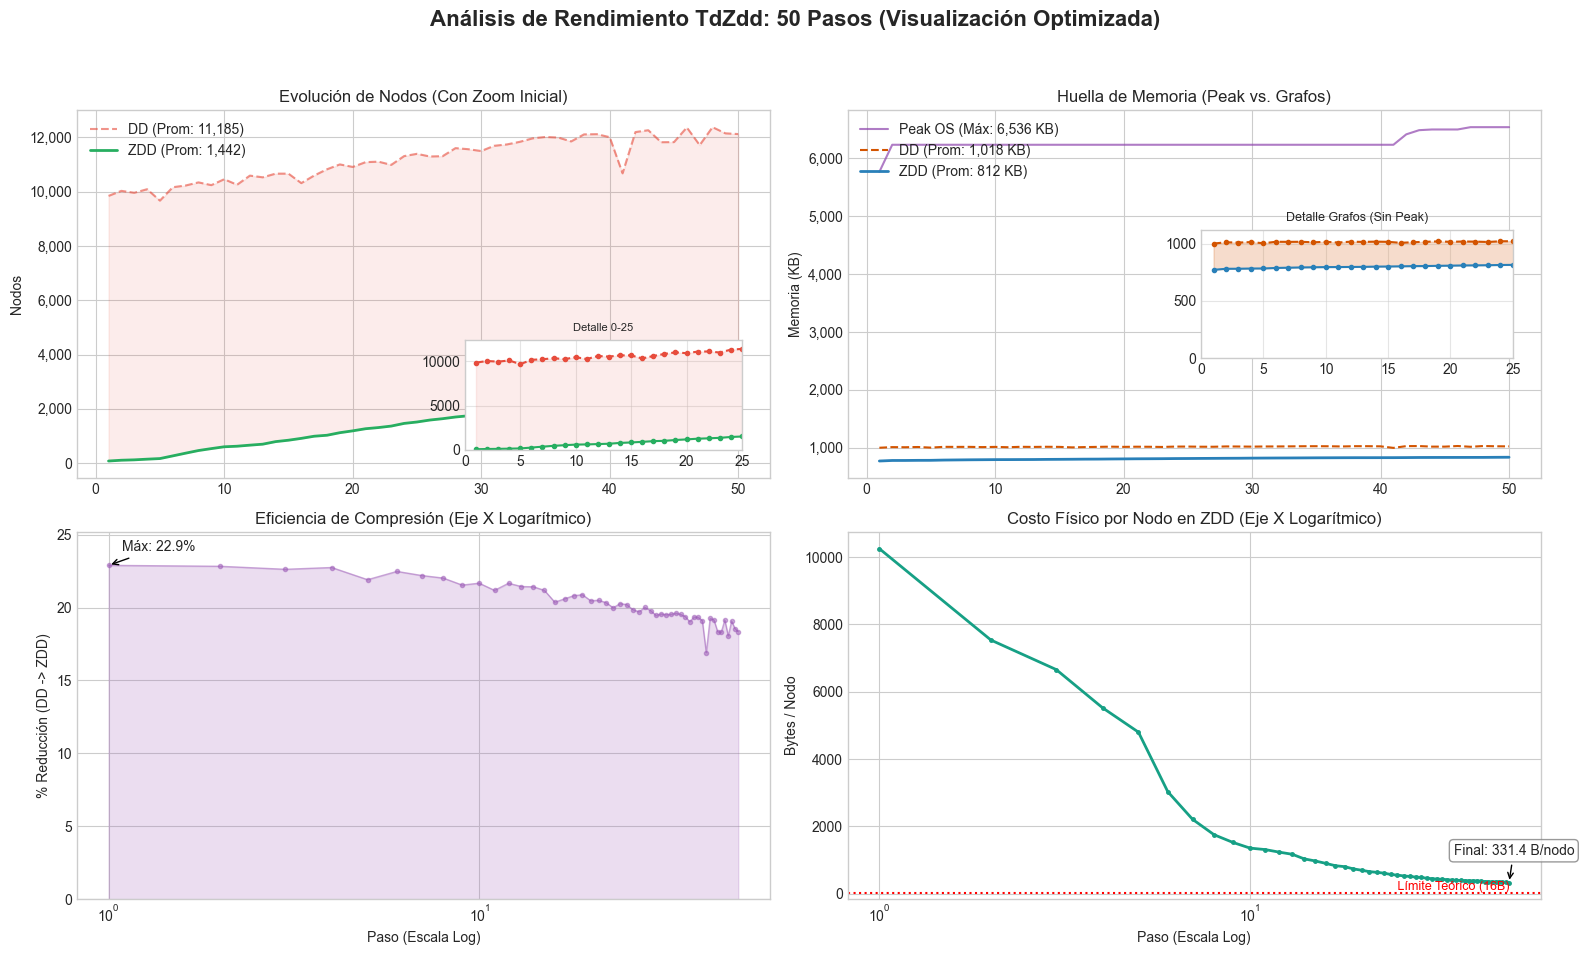

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os

# Path archivos
OUTPUT_DIR = "resultados_test/"
CSV_FILE = "memoria_log_2.csv"
CSV_PATH = os.path.join(OUTPUT_DIR, CSV_FILE)

if not os.path.exists(CSV_PATH):
    print(f"Error: No se encontró {CSV_PATH}")
    exit()

print(f"Leyendo: {CSV_PATH}")
df = pd.read_csv(CSV_PATH)

# Cálculos
df['Reduccion_Pct'] = ((df['Bytes_DD'] - df['Bytes_ZDD']) / df['Bytes_DD']) * 100
df['Bytes_Por_Nodo'] = df['Bytes_ZDD'] / df['Nodos_ZDD']

# Estilo
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('ggplot')

C_DD   = '#e74c3c'  
C_ZDD  = '#27ae60'  
C_MEM_DD = '#d35400' 
C_MEM_Z = '#2980b9' 
C_PEAK  = '#8e44ad' 
C_EFF   = '#9b59b6' 
C_DENS  = '#16a085' 

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(f'Análisis de Rendimiento TdZdd: {len(df)} Pasos (Visualización Optimizada)', fontsize=16, fontweight='bold')
fmt_miles = ticker.StrMethodFormatter('{x:,.0f}')

# Calcular rango del zoom, se plantean minimo 100 conjuntos (pasos) o 50% si tiene menos
pasos = int(min(100, len(df) * 0.5))

# Promedios
avg_nodos_dd = df['Nodos_DD'].mean()
avg_nodos_zdd = df['Nodos_ZDD'].mean()
avg_mem_dd = df['KB_DD'].mean()
avg_mem_zdd = df['KB_ZDD'].mean()
max_peak = df['Peak_Mem_KB'].max()

# EVOLUCIÓN ESTRUCTURAL, OSEA LOS NODOS (Con ZOOM INSET)
ax1 = axs[0, 0]
ax1.plot(df['Paso'], df['Nodos_DD'], label=f'DD (Prom: {avg_nodos_dd:,.0f})', color=C_DD, linestyle='--', alpha=0.6)
ax1.plot(df['Paso'], df['Nodos_ZDD'], label=f'ZDD (Prom: {avg_nodos_zdd:,.0f})', color=C_ZDD, linewidth=2)
ax1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)

ax1.set_title('Evolución de Nodos (Con Zoom Inicial)', fontsize=12)
ax1.set_ylabel('Nodos')
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(fmt_miles)

axins1 = inset_axes(ax1, width="40%", height="30%", loc='lower right', borderpad=2)
axins1.plot(df['Paso'], df['Nodos_DD'], color=C_DD, linestyle='--', marker='.')
axins1.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, marker='.')
axins1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
axins1.set_xlim(0, pasos) 
axins1.set_ylim(0, df['Nodos_DD'].iloc[pasos] * 1.1) 
axins1.grid(True, alpha=0.5)
axins1.set_title(f"Detalle 0-{pasos}", fontsize=8)

# CONSUMO MEMORIA (Con ZOOM INSET)
ax2 = axs[0, 1]

ax2.plot(df['Paso'], df['Peak_Mem_KB'], label=f'Peak OS (Máx: {max_peak:,.0f} KB)', 
         color=C_PEAK, linestyle='-', linewidth=1.5, alpha=0.7)
ax2.plot(df['Paso'], df['KB_DD'], label=f'DD (Prom: {avg_mem_dd:,.0f} KB)', color=C_MEM_DD, linestyle='--')
ax2.plot(df['Paso'], df['KB_ZDD'], label=f'ZDD (Prom: {avg_mem_zdd:,.0f} KB)', color=C_MEM_Z, linewidth=2)

ax2.set_title('Huella de Memoria (Peak vs. Grafos)', fontsize=12)
ax2.set_ylabel('Memoria (KB)')
ax2.legend(loc='upper left')
ax2.yaxis.set_major_formatter(fmt_miles)

axins2 = inset_axes(ax2, width="45%", height="35%", loc='center right', borderpad=2)
axins2.plot(df['Paso'], df['KB_DD'], color=C_MEM_DD, linestyle='--', marker='.', label='DD')
axins2.plot(df['Paso'], df['KB_ZDD'], color=C_MEM_Z, marker='.', label='ZDD')
axins2.fill_between(df['Paso'], df['KB_DD'], df['KB_ZDD'], color=C_MEM_DD, alpha=0.2)

axins2.set_xlim(0, pasos)
ymax_zoom = df['KB_DD'].iloc[pasos] * 1.1 
axins2.set_ylim(0, ymax_zoom)
axins2.grid(True, alpha=0.5)
axins2.set_title(f"Detalle Grafos (Sin Peak)", fontsize=9)

# EFICIENCIA (EJE X LOGARÍTMICO Para visualizacion)
ax3 = axs[1, 0]
ax3.semilogx(df['Paso'], df['Reduccion_Pct'], color=C_EFF, linewidth=1, marker='o', markersize=3, alpha=0.5)
ax3.fill_between(df['Paso'], df['Reduccion_Pct'], color=C_EFF, alpha=0.2)

ax3.set_title('Eficiencia de Compresión (Eje X Logarítmico)', fontsize=12)
ax3.set_ylabel('% Reducción (DD -> ZDD)')
ax3.set_xlabel('Paso (Escala Log)')
ax3.set_ylim(0, max(df['Reduccion_Pct']) * 1.1)

max_eff = df['Reduccion_Pct'].max()
max_eff_idx = df['Reduccion_Pct'].idxmax()
ax3.annotate(f'Máx: {max_eff:.1f}%', 
             xy=(df['Paso'][max_eff_idx], max_eff), 
             xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'))

# DENSIDAD (EJE X LOGARÍTMICO Para visualizacion)
ax4 = axs[1, 1]
ax4.semilogx(df['Paso'], df['Bytes_Por_Nodo'], color=C_DENS, linewidth=2, marker='.', markersize=5)

ax4.axhline(y=16, color='r', linestyle=':', label='Payload (16B)')
ax4.text(df['Paso'].iloc[-1], 16.5, ' Límite Teórico (16B)', color='r', va='bottom', ha='right', fontsize=9)

ax4.set_title('Costo Físico por Nodo en ZDD (Eje X Logarítmico)', fontsize=12)
ax4.set_ylabel('Bytes / Nodo')
ax4.set_xlabel('Paso (Escala Log)')

val_final = df['Bytes_Por_Nodo'].iloc[-1]
ax4.annotate(f'Final: {val_final:.1f} B/nodo', 
             xy=(df['Paso'].iloc[-1], val_final), 
             xytext=(-40, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

NOTA : Recordar aca la evoluciòn es añadiendo en cada "Paso" o "tiempo" un conjunto

Leyendo Log: resultados_test/memoria_log.csv
Leyendo Dataset Original para precisión: archivos_test/conjuntos.txt


C:\Users\carlo\AppData\Local\Temp\ipykernel_30088\2943536690.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.99])


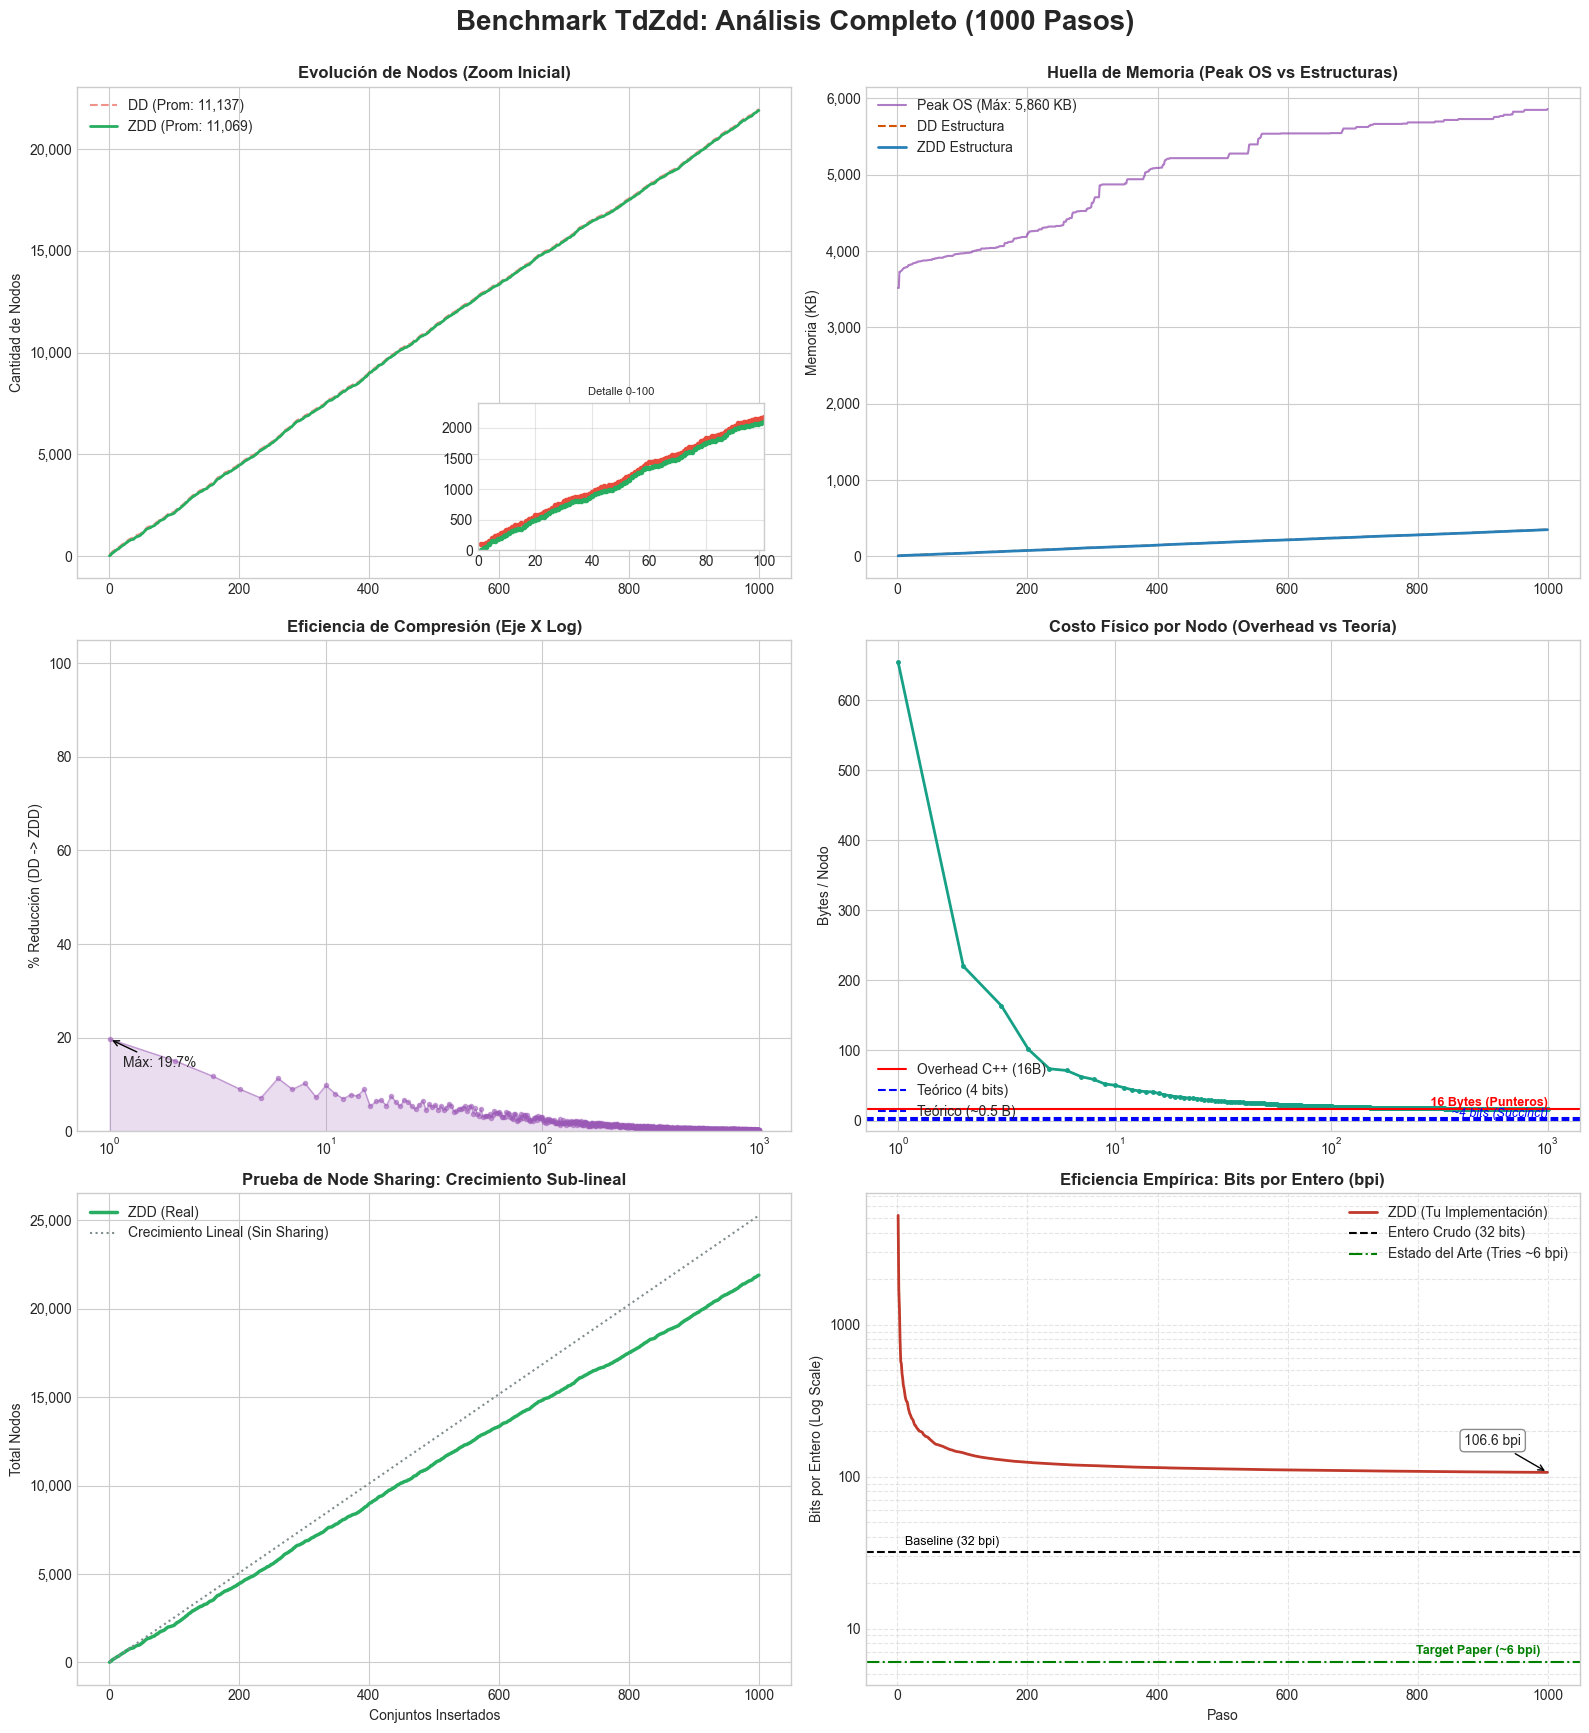

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
import numpy as np

# --- CONFIGURACIÓN ---
OUTPUT_DIR = "resultados_test/"
CSV_FILE = "memoria_log.csv"
DATASET_FILE = "archivos_test/conjuntos.txt" 

CSV_PATH = os.path.join(OUTPUT_DIR, CSV_FILE)

if not os.path.exists(CSV_PATH):
    print(f"Error: No se encontró {CSV_PATH}")
    exit()

print(f"Leyendo Log: {CSV_PATH}")
df = pd.read_csv(CSV_PATH)

# --- CÁLCULO DE TOTAL DE ENTEROS (PARA BPI) ---
counts = []
dataset_leido = False

if os.path.exists(DATASET_FILE):
    print(f"Leyendo Dataset Original para precisión: {DATASET_FILE}")
    try:
        acc = 0
        with open(DATASET_FILE, 'r') as f:
            for i, line in enumerate(f):
                parts = line.split()
                acc += len(parts)
                counts.append(acc)
                # Optimización: No leer más allá de lo necesario si el archivo es gigante
                if len(counts) > len(df) + 100: break
        dataset_leido = True
    except Exception as e:
        print(f"Advertencia: Error leyendo dataset ({e}).")

# Asignación robusta de Total_Ints
if dataset_leido and len(counts) > 0:
    # Si tenemos datos reales
    if len(counts) >= len(df):
        df['Total_Ints'] = counts[:len(df)]
    else:
        print("Advertencia: El dataset es más corto que el log. Usando proyección para el resto.")
        # Proyección basada en el promedio de lo leído
        avg_real = counts[-1] / len(counts)
        last_val = counts[-1]
        missing = len(df) - len(counts)
        projection = [last_val + avg_real * (j+1) for j in range(missing)]
        df['Total_Ints'] = counts + projection
else:
    # Fallback estadístico (si no existe el archivo)
    print("Usando estimación promedio (27.5 ints/set) por defecto.")
    df['Total_Ints'] = df['Paso'] * 27.5  # Ajusta este valor si sabes el promedio real

# --- METRICAS ---
# 1. Porcentaje de Reducción
df['Reduccion_Pct'] = ((df['Bytes_DD'] - df['Bytes_ZDD']) / df['Bytes_DD']) * 100

# 2. Bytes Físicos por Nodo (Implementación)
df['Bytes_Por_Nodo'] = df['Bytes_ZDD'] / df['Nodos_ZDD']

# 3. BITS PER INTEGER (Métrica del Paper)
# Evitar división por cero
df['bpi'] = np.where(df['Total_Ints'] > 0, (df['Bytes_ZDD'] * 8) / df['Total_Ints'], 0)


# --- ESTILO ---
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('ggplot')

# Paleta de Colores
C_DD     = '#e74c3c'   # Rojo 
C_ZDD    = '#27ae60'   # Verde 
C_MEM_DD = '#d35400'   
C_MEM_Z  = '#2980b9'   
C_PEAK   = '#8e44ad'   
C_EFF    = '#9b59b6'   
C_DENS   = '#16a085'   
C_THEORY = '#7f8c8d'   
C_BPI    = '#c0392b'   # Rojo Oscuro para BPI

# Layout 3x2 (6 Gráficos)
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle(f'Benchmark TdZdd: Análisis Completo ({len(df)} Pasos)', fontsize=20, fontweight='bold', y=0.99)
fmt_miles = ticker.StrMethodFormatter('{x:,.0f}')

# Calcular rango del zoom
pasos_zoom = int(min(100, len(df) * 0.5))
avg_nodos_dd = df['Nodos_DD'].mean()
avg_nodos_zdd = df['Nodos_ZDD'].mean()
avg_mem_dd = df['KB_DD'].mean()
avg_mem_zdd = df['KB_ZDD'].mean()
max_peak = df['Peak_Mem_KB'].max()

# ==============================================================================
# FILA 1: ESTRUCTURA Y MEMORIA
# ==============================================================================

# GRÁFICO 1: EVOLUCIÓN ESTRUCTURAL
ax1 = axs[0, 0]
ax1.plot(df['Paso'], df['Nodos_DD'], label=f'DD (Prom: {avg_nodos_dd:,.0f})', color=C_DD, linestyle='--', alpha=0.6)
ax1.plot(df['Paso'], df['Nodos_ZDD'], label=f'ZDD (Prom: {avg_nodos_zdd:,.0f})', color=C_ZDD, linewidth=2)
ax1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
ax1.set_title('Evolución de Nodos (Zoom Inicial)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cantidad de Nodos')
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(fmt_miles)

# Zoom
axins1 = inset_axes(ax1, width="40%", height="30%", loc='lower right', borderpad=2)
axins1.plot(df['Paso'], df['Nodos_DD'], color=C_DD, linestyle='--', marker='.')
axins1.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, marker='.')
axins1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
axins1.set_xlim(0, pasos_zoom) 
axins1.set_ylim(0, df['Nodos_DD'].iloc[pasos_zoom] * 1.1) 
axins1.grid(True, alpha=0.5)
axins1.set_title(f"Detalle 0-{pasos_zoom}", fontsize=8)

# GRÁFICO 2: MEMORIA
ax2 = axs[0, 1]
ax2.plot(df['Paso'], df['Peak_Mem_KB'], label=f'Peak OS (Máx: {max_peak:,.0f} KB)', 
         color=C_PEAK, linestyle='-', linewidth=1.5, alpha=0.7)
ax2.plot(df['Paso'], df['KB_DD'], label=f'DD Estructura', color=C_MEM_DD, linestyle='--')
ax2.plot(df['Paso'], df['KB_ZDD'], label=f'ZDD Estructura', color=C_MEM_Z, linewidth=2)
ax2.set_title('Huella de Memoria (Peak OS vs Estructuras)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Memoria (KB)')
ax2.legend(loc='upper left')
ax2.yaxis.set_major_formatter(fmt_miles)

# ==============================================================================
# FILA 2: METRICAS DE EFICIENCIA
# ==============================================================================

# GRÁFICO 3: EFICIENCIA REDUCCIÓN
ax3 = axs[1, 0]
ax3.semilogx(df['Paso'], df['Reduccion_Pct'], color=C_EFF, linewidth=1, marker='o', markersize=3, alpha=0.5)
ax3.fill_between(df['Paso'], df['Reduccion_Pct'], color=C_EFF, alpha=0.2)
ax3.set_title('Eficiencia de Compresión (Eje X Log)', fontsize=12, fontweight='bold')
ax3.set_ylabel('% Reducción (DD -> ZDD)')
ax3.set_ylim(0, 105)
max_eff = df['Reduccion_Pct'].max()
max_eff_idx = df['Reduccion_Pct'].idxmax()
ax3.annotate(f'Máx: {max_eff:.1f}%', xy=(df['Paso'].iloc[max_eff_idx], max_eff), xytext=(10, -20), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

# GRÁFICO 4: COSTO FÍSICO POR NODO
ax4 = axs[1, 1]
ax4.semilogx(df['Paso'], df['Bytes_Por_Nodo'], color=C_DENS, linewidth=2, marker='.', markersize=5)
ax4.axhline(y=16, color='r', linestyle='-', label='Overhead C++ (16B)')
ax4.text(df['Paso'].iloc[-1], 16.5, ' 16 Bytes (Punteros)', color='r', va='bottom', ha='right', fontsize=9, fontweight='bold')
ax4.axhline(y=4, color='blue', linestyle='--', label='Teórico (4 bits)') # Ojo: 4 bits != 4 bytes, pero aqui graficamos BYTES. 4 bits = 0.5 Bytes. 
# CORRECCION IMPORTANTE: Si graficamos Bytes, la linea de 4 bits debe estar en 0.5
ax4.axhline(y=0.5, color='blue', linestyle='--', label='Teórico (~0.5 B)')
ax4.text(df['Paso'].iloc[-1], 0.6, ' ~4 bits (Succinct)', color='blue', va='bottom', ha='right', fontsize=9, fontstyle='italic')

ax4.set_title('Costo Físico por Nodo (Overhead vs Teoría)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Bytes / Nodo')
ax4.legend(loc='lower left')

# ==============================================================================
# FILA 3: ANÁLISIS AVANZADO & PAPER
# ==============================================================================

# GRÁFICO 5: SUBLINEALIDAD
ax5 = axs[2, 0]
base_idx = min(10, len(df)-1)
slope = df['Nodos_ZDD'].iloc[base_idx] / df['Paso'].iloc[base_idx] if base_idx > 0 else 1
linear_proj = df['Paso'] * slope
ax5.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, linewidth=2.5, label='ZDD (Real)')
ax5.plot(df['Paso'], linear_proj, color=C_THEORY, linestyle=':', label='Crecimiento Lineal (Sin Sharing)')
ax5.set_title('Prueba de Node Sharing: Crecimiento Sub-lineal', fontsize=12, fontweight='bold')
ax5.set_ylabel('Total Nodos')
ax5.set_xlabel('Conjuntos Insertados')
ax5.legend()
ax5.yaxis.set_major_formatter(fmt_miles)

# ------------------------------------------------------------------------------
# GRÁFICO 6: BITS PER INTEGER (Métrica del Paper)
# ------------------------------------------------------------------------------
ax6 = axs[2, 1]

# Curva Real (Log Scale para ver detalle en valores bajos)
ax6.semilogy(df['Paso'], df['bpi'], color=C_BPI, linewidth=2, label='ZDD (Tu Implementación)')

# Referencias
ax6.axhline(y=32, color='black', linestyle='--', linewidth=1.5, label='Entero Crudo (32 bits)')
ax6.text(df['Paso'].iloc[0], 34, '  Baseline (32 bpi)', color='black', va='bottom', fontsize=9)

ax6.axhline(y=6, color='green', linestyle='-.', linewidth=1.5, label='Estado del Arte (Tries ~6 bpi)')
ax6.text(df['Paso'].iloc[-1], 6.5, 'Target Paper (~6 bpi)  ', color='green', va='bottom', ha='right', fontsize=9, fontweight='bold')

# Formato
ax6.set_title('Eficiencia Empírica: Bits por Entero (bpi)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Bits por Entero (Log Scale)')
ax6.set_xlabel('Paso')
ax6.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax6.grid(True, which='both', linestyle='--', alpha=0.5)
ax6.legend(loc='upper right')

# Anotación final
final_bpi = df['bpi'].iloc[-1]
msg_bpi = f"{final_bpi:.1f} bpi"
ax6.annotate(msg_bpi, 
             xy=(df['Paso'].iloc[-1], final_bpi), 
             xytext=(-60, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.9))

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

..

Leyendo Log: resultados_test/memoria_log_2.csv
Leyendo Dataset Original para precisión: archivos_test/conjuntos_2.txt


C:\Users\carlo\AppData\Local\Temp\ipykernel_30088\2961961214.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.99])


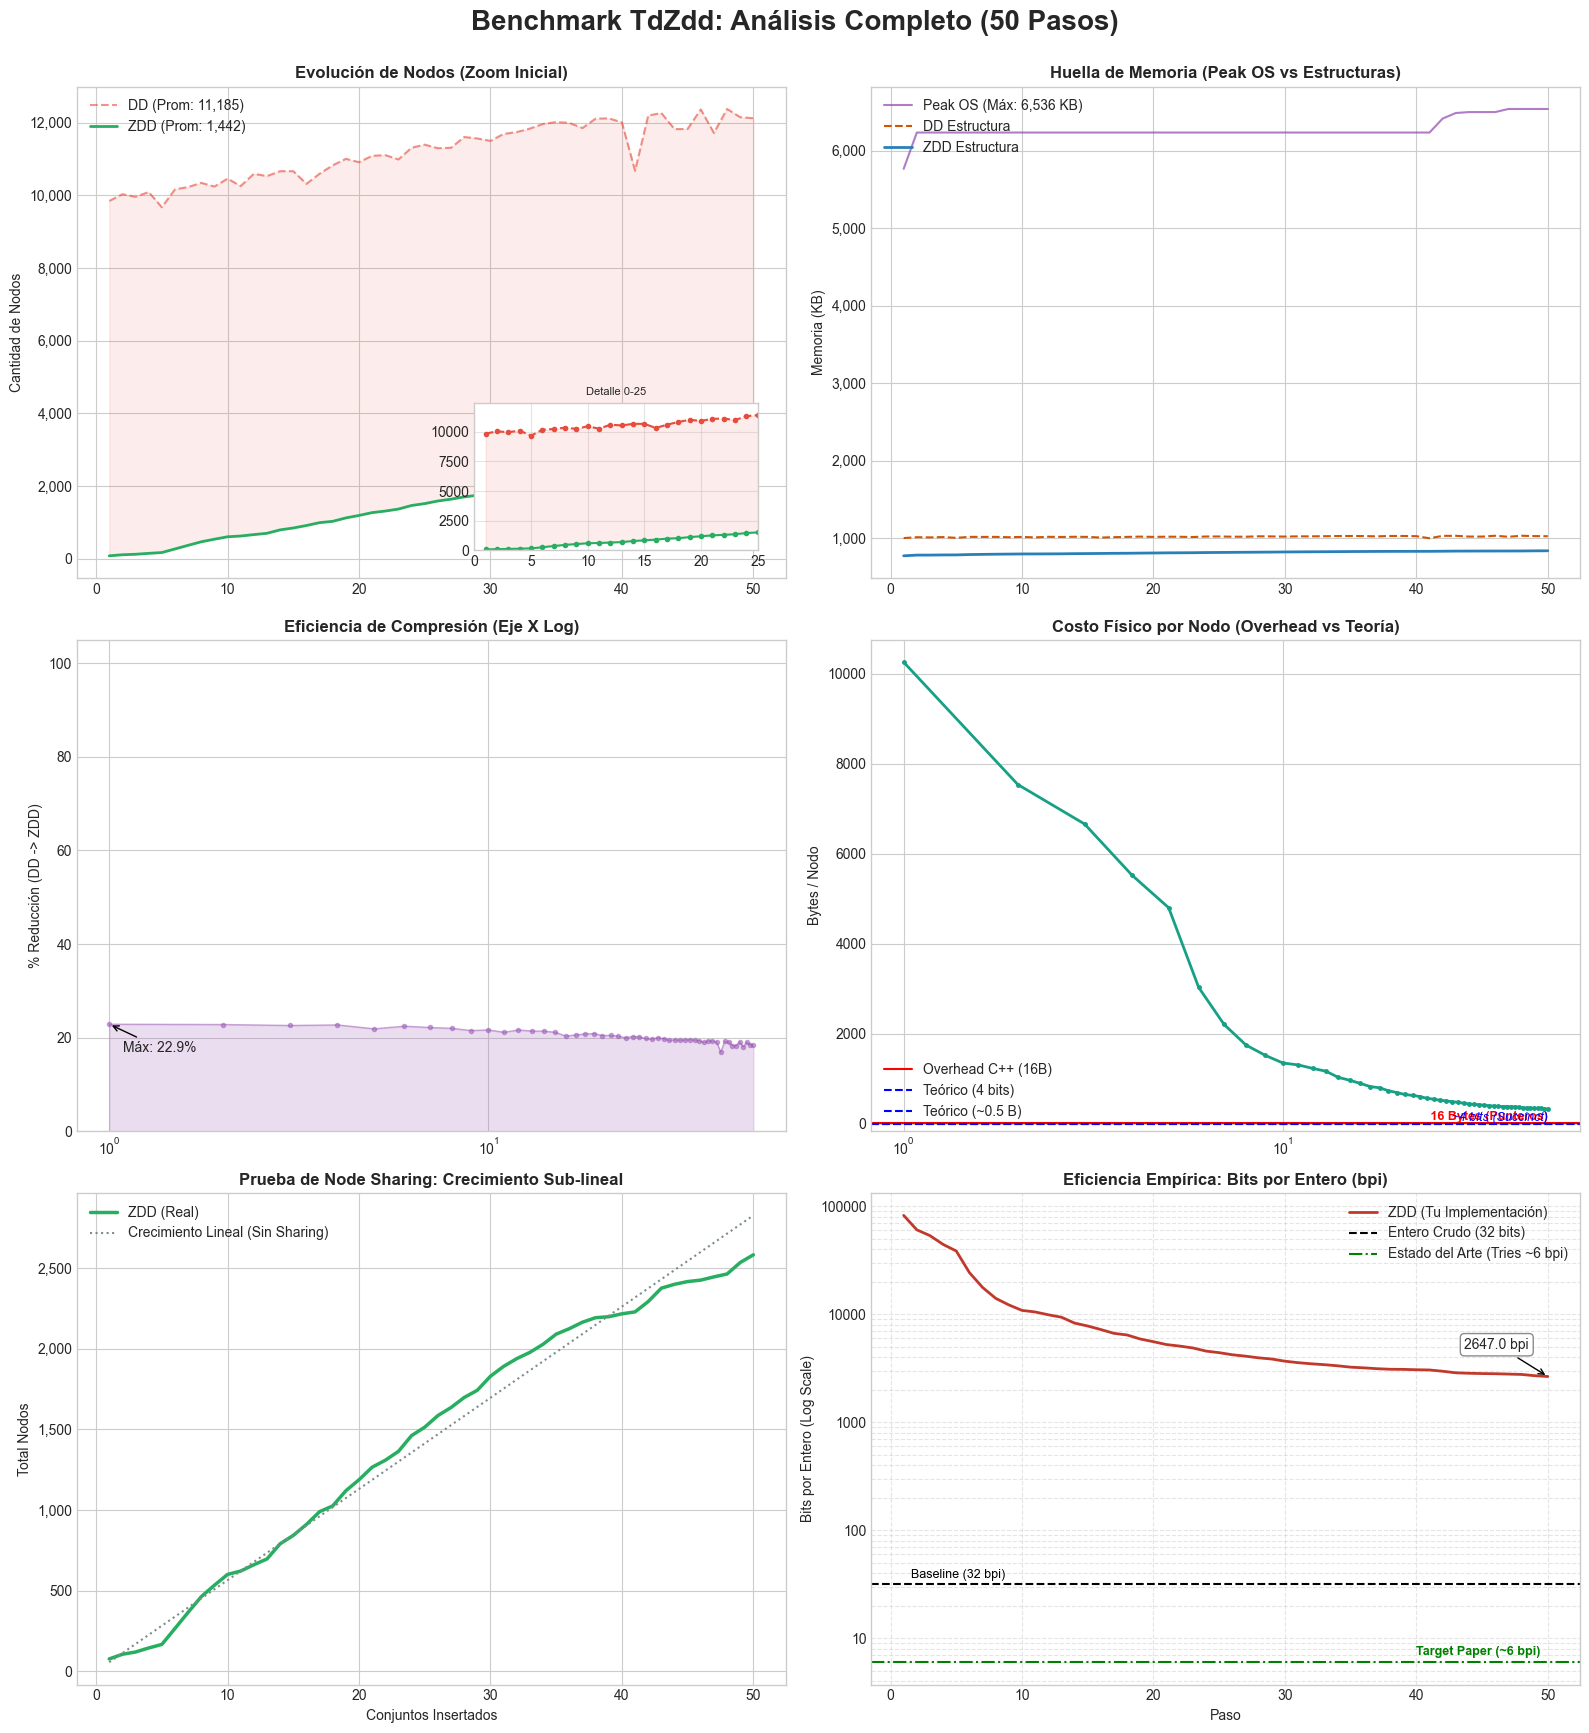

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
import numpy as np

# --- CONFIGURACIÓN ---
OUTPUT_DIR = "resultados_test/"
CSV_FILE = "memoria_log_2.csv"
DATASET_FILE = "archivos_test/conjuntos_2.txt" 

CSV_PATH = os.path.join(OUTPUT_DIR, CSV_FILE)

if not os.path.exists(CSV_PATH):
    print(f"Error: No se encontró {CSV_PATH}")
    exit()

print(f"Leyendo Log: {CSV_PATH}")
df = pd.read_csv(CSV_PATH)

# --- CÁLCULO DE TOTAL DE ENTEROS (PARA BPI) ---
counts = []
dataset_leido = False

if os.path.exists(DATASET_FILE):
    print(f"Leyendo Dataset Original para precisión: {DATASET_FILE}")
    try:
        acc = 0
        with open(DATASET_FILE, 'r') as f:
            for i, line in enumerate(f):
                parts = line.split()
                acc += len(parts)
                counts.append(acc)
                # Optimización: No leer más allá de lo necesario si el archivo es gigante
                if len(counts) > len(df) + 100: break
        dataset_leido = True
    except Exception as e:
        print(f"Advertencia: Error leyendo dataset ({e}).")

# Asignación robusta de Total_Ints
if dataset_leido and len(counts) > 0:
    # Si tenemos datos reales
    if len(counts) >= len(df):
        df['Total_Ints'] = counts[:len(df)]
    else:
        print("Advertencia: El dataset es más corto que el log. Usando proyección para el resto.")
        # Proyección basada en el promedio de lo leído
        avg_real = counts[-1] / len(counts)
        last_val = counts[-1]
        missing = len(df) - len(counts)
        projection = [last_val + avg_real * (j+1) for j in range(missing)]
        df['Total_Ints'] = counts + projection
else:
    # Fallback estadístico (si no existe el archivo)
    print("Usando estimación promedio (27.5 ints/set) por defecto.")
    df['Total_Ints'] = df['Paso'] * 27.5  # Ajusta este valor si sabes el promedio real

# --- METRICAS ---
# 1. Porcentaje de Reducción
df['Reduccion_Pct'] = ((df['Bytes_DD'] - df['Bytes_ZDD']) / df['Bytes_DD']) * 100

# 2. Bytes Físicos por Nodo (Implementación)
df['Bytes_Por_Nodo'] = df['Bytes_ZDD'] / df['Nodos_ZDD']

# 3. BITS PER INTEGER (Métrica del Paper)
# Evitar división por cero
df['bpi'] = np.where(df['Total_Ints'] > 0, (df['Bytes_ZDD'] * 8) / df['Total_Ints'], 0)


# --- ESTILO ---
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('ggplot')

# Paleta de Colores
C_DD     = '#e74c3c'   # Rojo 
C_ZDD    = '#27ae60'   # Verde 
C_MEM_DD = '#d35400'   
C_MEM_Z  = '#2980b9'   
C_PEAK   = '#8e44ad'   
C_EFF    = '#9b59b6'   
C_DENS   = '#16a085'   
C_THEORY = '#7f8c8d'   
C_BPI    = '#c0392b'   # Rojo Oscuro para BPI

# Layout 3x2 (6 Gráficos)
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle(f'Benchmark TdZdd: Análisis Completo ({len(df)} Pasos)', fontsize=20, fontweight='bold', y=0.99)
fmt_miles = ticker.StrMethodFormatter('{x:,.0f}')

# Calcular rango del zoom
pasos_zoom = int(min(100, len(df) * 0.5))
avg_nodos_dd = df['Nodos_DD'].mean()
avg_nodos_zdd = df['Nodos_ZDD'].mean()
avg_mem_dd = df['KB_DD'].mean()
avg_mem_zdd = df['KB_ZDD'].mean()
max_peak = df['Peak_Mem_KB'].max()

# ==============================================================================
# FILA 1: ESTRUCTURA Y MEMORIA
# ==============================================================================

# GRÁFICO 1: EVOLUCIÓN ESTRUCTURAL
ax1 = axs[0, 0]
ax1.plot(df['Paso'], df['Nodos_DD'], label=f'DD (Prom: {avg_nodos_dd:,.0f})', color=C_DD, linestyle='--', alpha=0.6)
ax1.plot(df['Paso'], df['Nodos_ZDD'], label=f'ZDD (Prom: {avg_nodos_zdd:,.0f})', color=C_ZDD, linewidth=2)
ax1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
ax1.set_title('Evolución de Nodos (Zoom Inicial)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cantidad de Nodos')
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(fmt_miles)

# Zoom
axins1 = inset_axes(ax1, width="40%", height="30%", loc='lower right', borderpad=2)
axins1.plot(df['Paso'], df['Nodos_DD'], color=C_DD, linestyle='--', marker='.')
axins1.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, marker='.')
axins1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
axins1.set_xlim(0, pasos_zoom) 
axins1.set_ylim(0, df['Nodos_DD'].iloc[pasos_zoom] * 1.1) 
axins1.grid(True, alpha=0.5)
axins1.set_title(f"Detalle 0-{pasos_zoom}", fontsize=8)

# GRÁFICO 2: MEMORIA
ax2 = axs[0, 1]
ax2.plot(df['Paso'], df['Peak_Mem_KB'], label=f'Peak OS (Máx: {max_peak:,.0f} KB)', 
         color=C_PEAK, linestyle='-', linewidth=1.5, alpha=0.7)
ax2.plot(df['Paso'], df['KB_DD'], label=f'DD Estructura', color=C_MEM_DD, linestyle='--')
ax2.plot(df['Paso'], df['KB_ZDD'], label=f'ZDD Estructura', color=C_MEM_Z, linewidth=2)
ax2.set_title('Huella de Memoria (Peak OS vs Estructuras)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Memoria (KB)')
ax2.legend(loc='upper left')
ax2.yaxis.set_major_formatter(fmt_miles)

# ==============================================================================
# FILA 2: METRICAS DE EFICIENCIA
# ==============================================================================

# GRÁFICO 3: EFICIENCIA REDUCCIÓN
ax3 = axs[1, 0]
ax3.semilogx(df['Paso'], df['Reduccion_Pct'], color=C_EFF, linewidth=1, marker='o', markersize=3, alpha=0.5)
ax3.fill_between(df['Paso'], df['Reduccion_Pct'], color=C_EFF, alpha=0.2)
ax3.set_title('Eficiencia de Compresión (Eje X Log)', fontsize=12, fontweight='bold')
ax3.set_ylabel('% Reducción (DD -> ZDD)')
ax3.set_ylim(0, 105)
max_eff = df['Reduccion_Pct'].max()
max_eff_idx = df['Reduccion_Pct'].idxmax()
ax3.annotate(f'Máx: {max_eff:.1f}%', xy=(df['Paso'].iloc[max_eff_idx], max_eff), xytext=(10, -20), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

# GRÁFICO 4: COSTO FÍSICO POR NODO
ax4 = axs[1, 1]
ax4.semilogx(df['Paso'], df['Bytes_Por_Nodo'], color=C_DENS, linewidth=2, marker='.', markersize=5)
ax4.axhline(y=16, color='r', linestyle='-', label='Overhead C++ (16B)')
ax4.text(df['Paso'].iloc[-1], 16.5, ' 16 Bytes (Punteros)', color='r', va='bottom', ha='right', fontsize=9, fontweight='bold')
ax4.axhline(y=4, color='blue', linestyle='--', label='Teórico (4 bits)') # Ojo: 4 bits != 4 bytes, pero aqui graficamos BYTES. 4 bits = 0.5 Bytes. 
# CORRECCION IMPORTANTE: Si graficamos Bytes, la linea de 4 bits debe estar en 0.5
ax4.axhline(y=0.5, color='blue', linestyle='--', label='Teórico (~0.5 B)')
ax4.text(df['Paso'].iloc[-1], 0.6, ' ~4 bits (Succinct)', color='blue', va='bottom', ha='right', fontsize=9, fontstyle='italic')

ax4.set_title('Costo Físico por Nodo (Overhead vs Teoría)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Bytes / Nodo')
ax4.legend(loc='lower left')

# ==============================================================================
# FILA 3: ANÁLISIS AVANZADO & PAPER
# ==============================================================================

# GRÁFICO 5: SUBLINEALIDAD
ax5 = axs[2, 0]
base_idx = min(10, len(df)-1)
slope = df['Nodos_ZDD'].iloc[base_idx] / df['Paso'].iloc[base_idx] if base_idx > 0 else 1
linear_proj = df['Paso'] * slope
ax5.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, linewidth=2.5, label='ZDD (Real)')
ax5.plot(df['Paso'], linear_proj, color=C_THEORY, linestyle=':', label='Crecimiento Lineal (Sin Sharing)')
ax5.set_title('Prueba de Node Sharing: Crecimiento Sub-lineal', fontsize=12, fontweight='bold')
ax5.set_ylabel('Total Nodos')
ax5.set_xlabel('Conjuntos Insertados')
ax5.legend()
ax5.yaxis.set_major_formatter(fmt_miles)

# ------------------------------------------------------------------------------
# GRÁFICO 6: BITS PER INTEGER (Métrica del Paper)
# ------------------------------------------------------------------------------
ax6 = axs[2, 1]

# Curva Real (Log Scale para ver detalle en valores bajos)
ax6.semilogy(df['Paso'], df['bpi'], color=C_BPI, linewidth=2, label='ZDD (Tu Implementación)')

# Referencias
ax6.axhline(y=32, color='black', linestyle='--', linewidth=1.5, label='Entero Crudo (32 bits)')
ax6.text(df['Paso'].iloc[0], 34, '  Baseline (32 bpi)', color='black', va='bottom', fontsize=9)

ax6.axhline(y=6, color='green', linestyle='-.', linewidth=1.5, label='Estado del Arte (Tries ~6 bpi)')
ax6.text(df['Paso'].iloc[-1], 6.5, 'Target Paper (~6 bpi)  ', color='green', va='bottom', ha='right', fontsize=9, fontweight='bold')

# Formato
ax6.set_title('Eficiencia Empírica: Bits por Entero (bpi)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Bits por Entero (Log Scale)')
ax6.set_xlabel('Paso')
ax6.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax6.grid(True, which='both', linestyle='--', alpha=0.5)
ax6.legend(loc='upper right')

# Anotación final
final_bpi = df['bpi'].iloc[-1]
msg_bpi = f"{final_bpi:.1f} bpi"
ax6.annotate(msg_bpi, 
             xy=(df['Paso'].iloc[-1], final_bpi), 
             xytext=(-60, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.9))

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

Leyendo Log: resultados_test/memoria_log_1mq_mini.csv
Leyendo Dataset Original para precisión: archivos_test/1mq_mini.txt


C:\Users\carlo\AppData\Local\Temp\ipykernel_30088\1472080338.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.99])


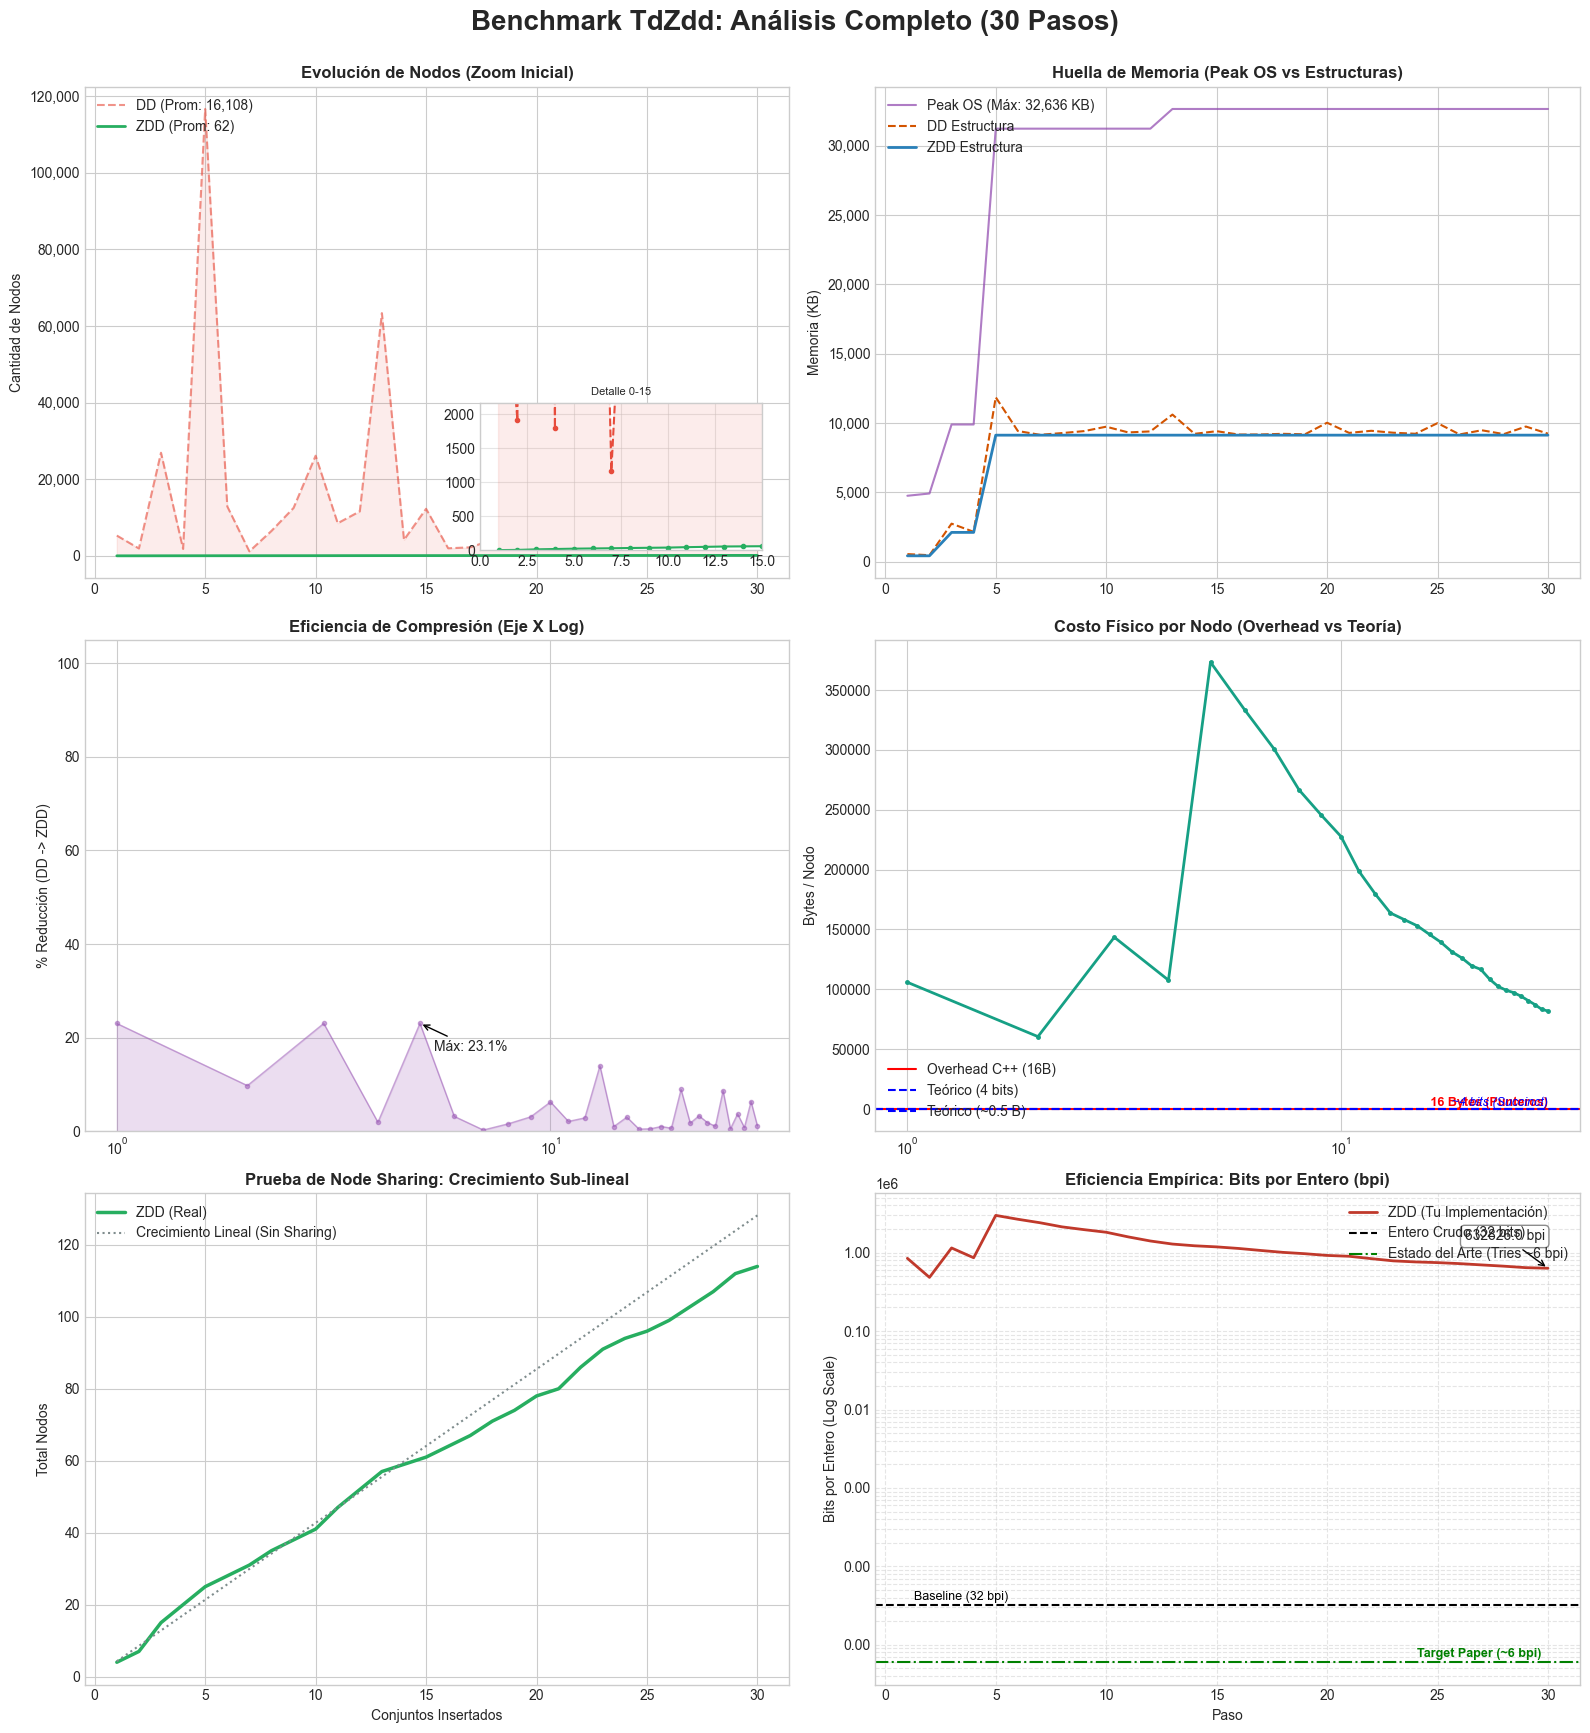

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
import numpy as np

# --- CONFIGURACIÓN ---
OUTPUT_DIR = "resultados_test/"
CSV_FILE = "memoria_log_1mq_mini.csv"
DATASET_FILE = "archivos_test/1mq_mini.txt" 

CSV_PATH = os.path.join(OUTPUT_DIR, CSV_FILE)

if not os.path.exists(CSV_PATH):
    print(f"Error: No se encontró {CSV_PATH}")
    exit()

print(f"Leyendo Log: {CSV_PATH}")
df = pd.read_csv(CSV_PATH)

# --- CÁLCULO DE TOTAL DE ENTEROS (PARA BPI) ---
counts = []
dataset_leido = False

if os.path.exists(DATASET_FILE):
    print(f"Leyendo Dataset Original para precisión: {DATASET_FILE}")
    try:
        acc = 0
        with open(DATASET_FILE, 'r') as f:
            for i, line in enumerate(f):
                parts = line.split()
                acc += len(parts)
                counts.append(acc)
                # Optimización: No leer más allá de lo necesario si el archivo es gigante
                if len(counts) > len(df) + 100: break
        dataset_leido = True
    except Exception as e:
        print(f"Advertencia: Error leyendo dataset ({e}).")

# Asignación robusta de Total_Ints
if dataset_leido and len(counts) > 0:
    # Si tenemos datos reales
    if len(counts) >= len(df):
        df['Total_Ints'] = counts[:len(df)]
    else:
        print("Advertencia: El dataset es más corto que el log. Usando proyección para el resto.")
        # Proyección basada en el promedio de lo leído
        avg_real = counts[-1] / len(counts)
        last_val = counts[-1]
        missing = len(df) - len(counts)
        projection = [last_val + avg_real * (j+1) for j in range(missing)]
        df['Total_Ints'] = counts + projection
else:
    # Fallback estadístico (si no existe el archivo)
    print("Usando estimación promedio (27.5 ints/set) por defecto.")
    df['Total_Ints'] = df['Paso'] * 27.5  # Ajusta este valor si sabes el promedio real

# --- METRICAS ---
# 1. Porcentaje de Reducción
df['Reduccion_Pct'] = ((df['Bytes_DD'] - df['Bytes_ZDD']) / df['Bytes_DD']) * 100

# 2. Bytes Físicos por Nodo (Implementación)
df['Bytes_Por_Nodo'] = df['Bytes_ZDD'] / df['Nodos_ZDD']

# 3. BITS PER INTEGER (Métrica del Paper)
# Evitar división por cero
df['bpi'] = np.where(df['Total_Ints'] > 0, (df['Bytes_ZDD'] * 8) / df['Total_Ints'], 0)


# --- ESTILO ---
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('ggplot')

# Paleta de Colores
C_DD     = '#e74c3c'   # Rojo 
C_ZDD    = '#27ae60'   # Verde 
C_MEM_DD = '#d35400'   
C_MEM_Z  = '#2980b9'   
C_PEAK   = '#8e44ad'   
C_EFF    = '#9b59b6'   
C_DENS   = '#16a085'   
C_THEORY = '#7f8c8d'   
C_BPI    = '#c0392b'   # Rojo Oscuro para BPI

# Layout 3x2 (6 Gráficos)
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle(f'Benchmark TdZdd: Análisis Completo ({len(df)} Pasos)', fontsize=20, fontweight='bold', y=0.99)
fmt_miles = ticker.StrMethodFormatter('{x:,.0f}')

# Calcular rango del zoom
pasos_zoom = int(min(100, len(df) * 0.5))
avg_nodos_dd = df['Nodos_DD'].mean()
avg_nodos_zdd = df['Nodos_ZDD'].mean()
avg_mem_dd = df['KB_DD'].mean()
avg_mem_zdd = df['KB_ZDD'].mean()
max_peak = df['Peak_Mem_KB'].max()

# ==============================================================================
# FILA 1: ESTRUCTURA Y MEMORIA
# ==============================================================================

# GRÁFICO 1: EVOLUCIÓN ESTRUCTURAL
ax1 = axs[0, 0]
ax1.plot(df['Paso'], df['Nodos_DD'], label=f'DD (Prom: {avg_nodos_dd:,.0f})', color=C_DD, linestyle='--', alpha=0.6)
ax1.plot(df['Paso'], df['Nodos_ZDD'], label=f'ZDD (Prom: {avg_nodos_zdd:,.0f})', color=C_ZDD, linewidth=2)
ax1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
ax1.set_title('Evolución de Nodos (Zoom Inicial)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cantidad de Nodos')
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(fmt_miles)

# Zoom
axins1 = inset_axes(ax1, width="40%", height="30%", loc='lower right', borderpad=2)
axins1.plot(df['Paso'], df['Nodos_DD'], color=C_DD, linestyle='--', marker='.')
axins1.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, marker='.')
axins1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
axins1.set_xlim(0, pasos_zoom) 
axins1.set_ylim(0, df['Nodos_DD'].iloc[pasos_zoom] * 1.1) 
axins1.grid(True, alpha=0.5)
axins1.set_title(f"Detalle 0-{pasos_zoom}", fontsize=8)

# GRÁFICO 2: MEMORIA
ax2 = axs[0, 1]
ax2.plot(df['Paso'], df['Peak_Mem_KB'], label=f'Peak OS (Máx: {max_peak:,.0f} KB)', 
         color=C_PEAK, linestyle='-', linewidth=1.5, alpha=0.7)
ax2.plot(df['Paso'], df['KB_DD'], label=f'DD Estructura', color=C_MEM_DD, linestyle='--')
ax2.plot(df['Paso'], df['KB_ZDD'], label=f'ZDD Estructura', color=C_MEM_Z, linewidth=2)
ax2.set_title('Huella de Memoria (Peak OS vs Estructuras)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Memoria (KB)')
ax2.legend(loc='upper left')
ax2.yaxis.set_major_formatter(fmt_miles)

# ==============================================================================
# FILA 2: METRICAS DE EFICIENCIA
# ==============================================================================

# GRÁFICO 3: EFICIENCIA REDUCCIÓN
ax3 = axs[1, 0]
ax3.semilogx(df['Paso'], df['Reduccion_Pct'], color=C_EFF, linewidth=1, marker='o', markersize=3, alpha=0.5)
ax3.fill_between(df['Paso'], df['Reduccion_Pct'], color=C_EFF, alpha=0.2)
ax3.set_title('Eficiencia de Compresión (Eje X Log)', fontsize=12, fontweight='bold')
ax3.set_ylabel('% Reducción (DD -> ZDD)')
ax3.set_ylim(0, 105)
max_eff = df['Reduccion_Pct'].max()
max_eff_idx = df['Reduccion_Pct'].idxmax()
ax3.annotate(f'Máx: {max_eff:.1f}%', xy=(df['Paso'].iloc[max_eff_idx], max_eff), xytext=(10, -20), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

# GRÁFICO 4: COSTO FÍSICO POR NODO
ax4 = axs[1, 1]
ax4.semilogx(df['Paso'], df['Bytes_Por_Nodo'], color=C_DENS, linewidth=2, marker='.', markersize=5)
ax4.axhline(y=16, color='r', linestyle='-', label='Overhead C++ (16B)')
ax4.text(df['Paso'].iloc[-1], 16.5, ' 16 Bytes (Punteros)', color='r', va='bottom', ha='right', fontsize=9, fontweight='bold')
ax4.axhline(y=4, color='blue', linestyle='--', label='Teórico (4 bits)') # Ojo: 4 bits != 4 bytes, pero aqui graficamos BYTES. 4 bits = 0.5 Bytes. 
# CORRECCION IMPORTANTE: Si graficamos Bytes, la linea de 4 bits debe estar en 0.5
ax4.axhline(y=0.5, color='blue', linestyle='--', label='Teórico (~0.5 B)')
ax4.text(df['Paso'].iloc[-1], 0.6, ' ~4 bits (Succinct)', color='blue', va='bottom', ha='right', fontsize=9, fontstyle='italic')

ax4.set_title('Costo Físico por Nodo (Overhead vs Teoría)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Bytes / Nodo')
ax4.legend(loc='lower left')

# ==============================================================================
# FILA 3: ANÁLISIS AVANZADO & PAPER
# ==============================================================================

# GRÁFICO 5: SUBLINEALIDAD
ax5 = axs[2, 0]
base_idx = min(10, len(df)-1)
slope = df['Nodos_ZDD'].iloc[base_idx] / df['Paso'].iloc[base_idx] if base_idx > 0 else 1
linear_proj = df['Paso'] * slope
ax5.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, linewidth=2.5, label='ZDD (Real)')
ax5.plot(df['Paso'], linear_proj, color=C_THEORY, linestyle=':', label='Crecimiento Lineal (Sin Sharing)')
ax5.set_title('Prueba de Node Sharing: Crecimiento Sub-lineal', fontsize=12, fontweight='bold')
ax5.set_ylabel('Total Nodos')
ax5.set_xlabel('Conjuntos Insertados')
ax5.legend()
ax5.yaxis.set_major_formatter(fmt_miles)

# ------------------------------------------------------------------------------
# GRÁFICO 6: BITS PER INTEGER (Métrica del Paper)
# ------------------------------------------------------------------------------
ax6 = axs[2, 1]

# Curva Real (Log Scale para ver detalle en valores bajos)
ax6.semilogy(df['Paso'], df['bpi'], color=C_BPI, linewidth=2, label='ZDD (Tu Implementación)')

# Referencias
ax6.axhline(y=32, color='black', linestyle='--', linewidth=1.5, label='Entero Crudo (32 bits)')
ax6.text(df['Paso'].iloc[0], 34, '  Baseline (32 bpi)', color='black', va='bottom', fontsize=9)

ax6.axhline(y=6, color='green', linestyle='-.', linewidth=1.5, label='Estado del Arte (Tries ~6 bpi)')
ax6.text(df['Paso'].iloc[-1], 6.5, 'Target Paper (~6 bpi)  ', color='green', va='bottom', ha='right', fontsize=9, fontweight='bold')

# Formato
ax6.set_title('Eficiencia Empírica: Bits por Entero (bpi)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Bits por Entero (Log Scale)')
ax6.set_xlabel('Paso')
ax6.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax6.grid(True, which='both', linestyle='--', alpha=0.5)
ax6.legend(loc='upper right')

# Anotación final
final_bpi = df['bpi'].iloc[-1]
msg_bpi = f"{final_bpi:.1f} bpi"
ax6.annotate(msg_bpi, 
             xy=(df['Paso'].iloc[-1], final_bpi), 
             xytext=(-60, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.9))

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

--- INICIO ANÁLISIS ---
Leyendo Log C++: 1mq_mini_30.csv
Leyendo Estructura Binaria PISA: archivos_test/1mq_mini_30.bin
 -> Cabecera PISA indica: 30 listas.
 -> Lectura completada. Total enteros en dataset: 108


C:\Users\carlo\AppData\Local\Temp\ipykernel_7700\2951874469.py:200: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.99])


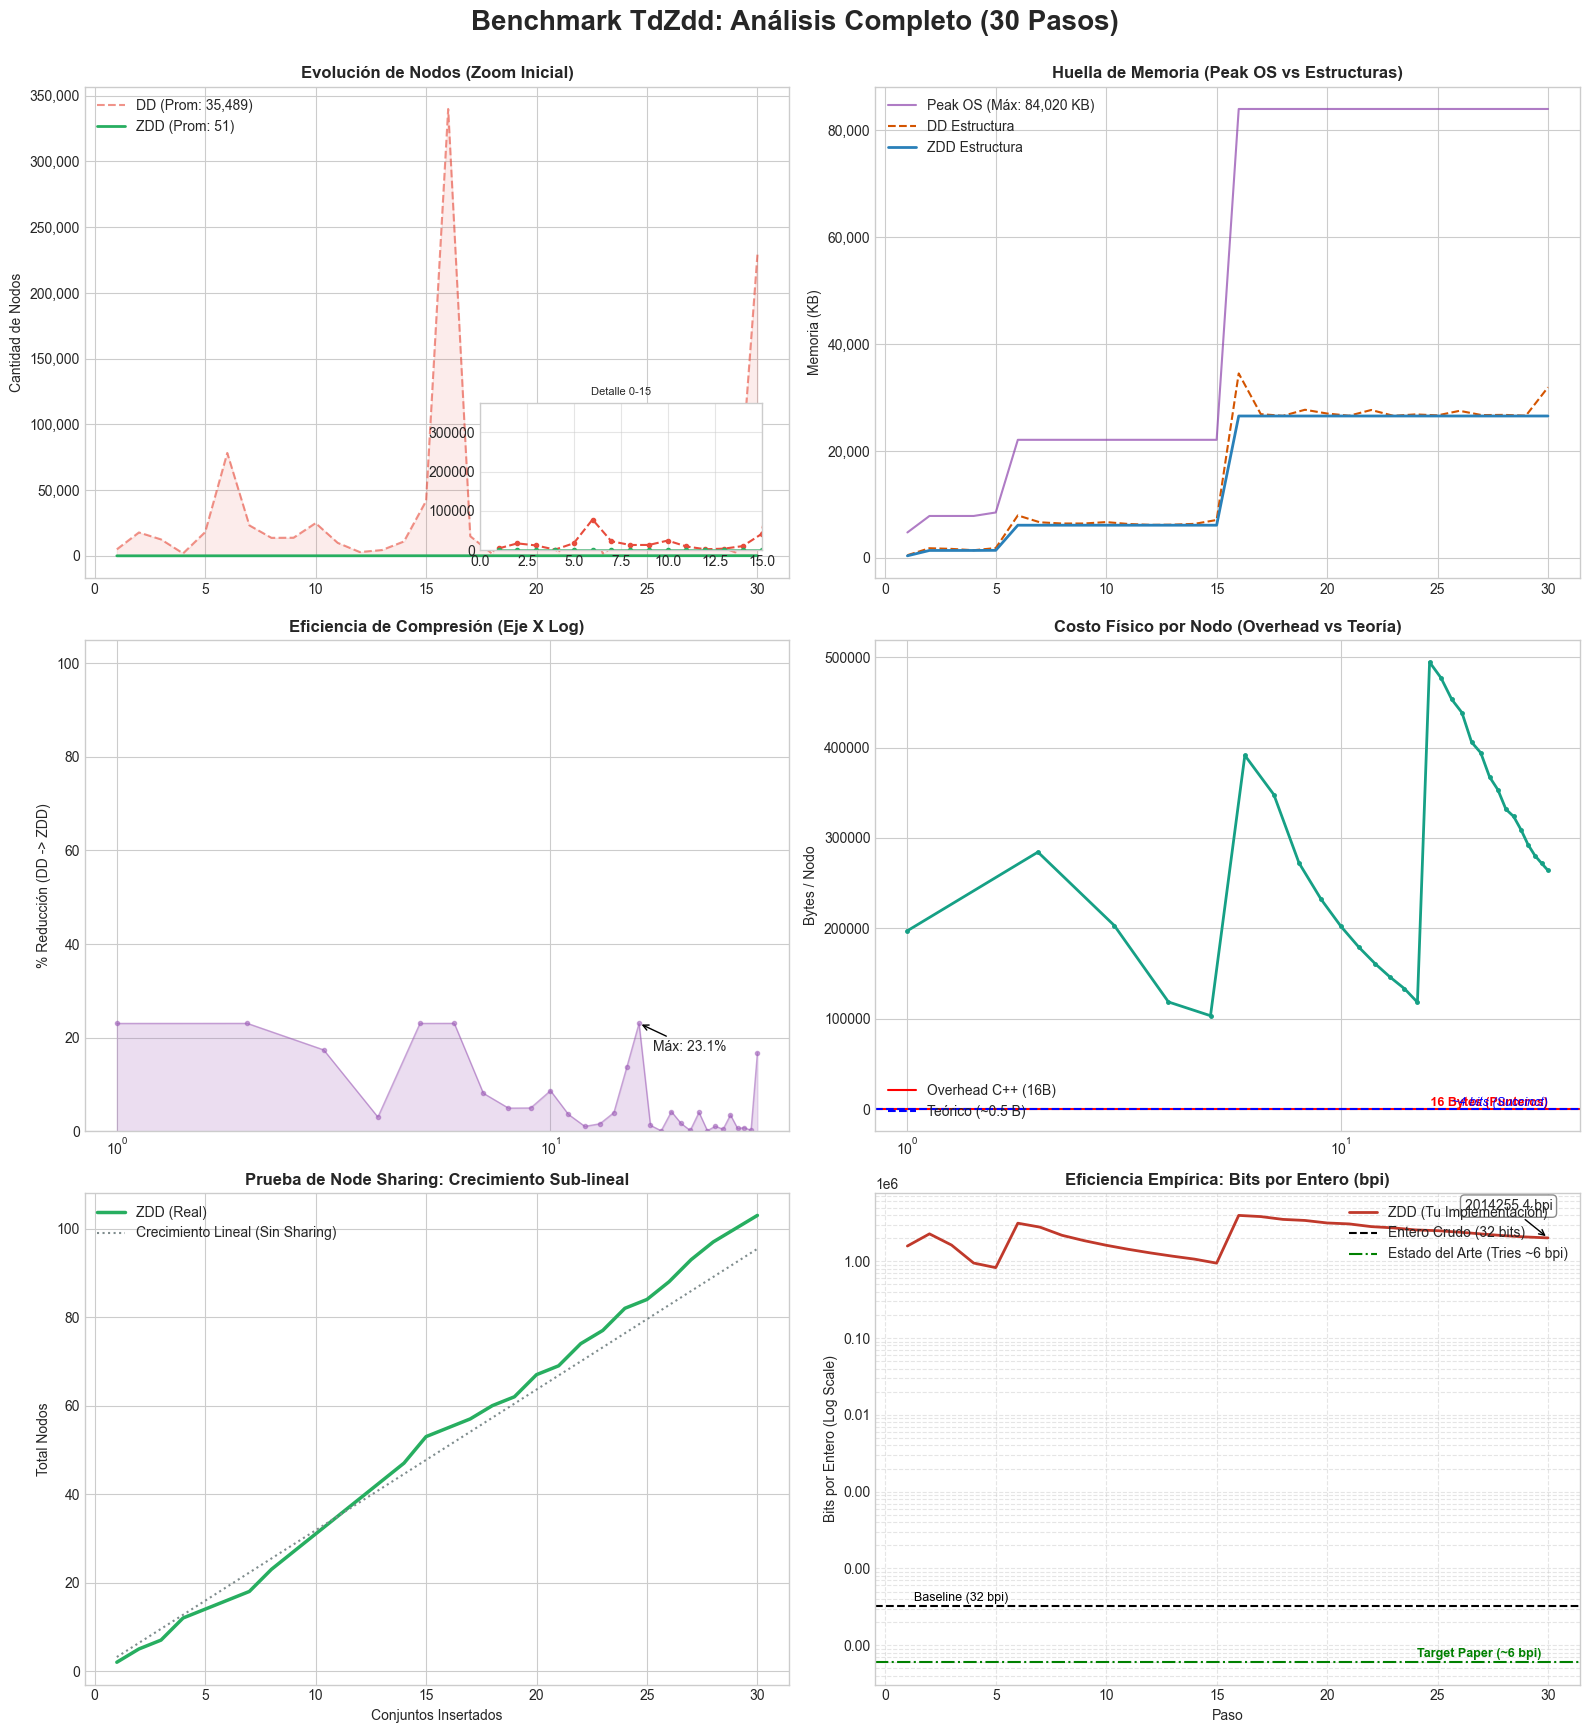

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
import numpy as np
import struct

# ==============================================================================
# 1. CONFIGURACIÓN
# ==============================================================================
OUTPUT_DIR = "resultados_test/"
CSV_FILE = "1mq_mini_30.csv"          # <--- Tu log de C++
BINARY_FILE = "archivos_test/1mq_mini_30.bin" # <--- Tu archivo PISA

CSV_PATH = os.path.join(OUTPUT_DIR, CSV_FILE)

if not os.path.exists(CSV_PATH):
    print(f"Error: No se encontró el CSV: {CSV_PATH}")
    exit()

if not os.path.exists(BINARY_FILE):
    print(f"Error: No se encontró el Binario: {BINARY_FILE}")
    exit()

print(f"--- INICIO ANÁLISIS ---")
print(f"Leyendo Log C++: {CSV_FILE}")
df = pd.read_csv(CSV_PATH)

# ==============================================================================
# 2. LECTURA DEL BINARIO PISA (Para calcular Total_Ints real y alinear)
# ==============================================================================
print(f"Leyendo Estructura Binaria PISA: {BINARY_FILE}")

counts = [] # Almacena la suma acumulada de enteros paso a paso
total_enteros_acumulado = 0

try:
    with open(BINARY_FILE, 'rb') as f:
        # 1. Leer Cabecera Global
        header_data = f.read(4)
        if not header_data: raise Exception("Archivo vacío")
        num_listas = struct.unpack('<I', header_data)[0]
        print(f" -> Cabecera PISA indica: {num_listas} listas.")

        # 2. Recorrer el archivo rápidamente (saltando datos)
        for i in range(num_listas):
            len_data = f.read(4)
            if not len_data: break
            n = struct.unpack('<I', len_data)[0]
            total_enteros_acumulado += n
            counts.append(total_enteros_acumulado)
            f.seek(n * 4, 1)

    print(f" -> Lectura completada. Total enteros en dataset: {total_enteros_acumulado:,}")

except Exception as e:
    print(f"ERROR CRÍTICO leyendo binario: {e}")
    exit()

# ==============================================================================
# 3. CÁLCULO DE MÉTRICAS
# ==============================================================================

# A. Mapear 'Paso' a 'Total_Ints' (Alineación exacta)
def get_total_ints(paso):
    idx = int(paso) - 1 
    if 0 <= idx < len(counts):
        return counts[idx]
    return np.nan 

df['Total_Ints'] = df['Paso'].apply(get_total_ints)
if df['Total_Ints'].isnull().any():
    df['Total_Ints'] = df['Total_Ints'].interpolate(method='linear')

# B. BITS PER INTEGER (bpi)
df['bpi'] = np.where(df['Total_Ints'] > 0, 
                     (df['Bytes_ZDD'] * 8) / df['Total_Ints'], 0)

# C. Porcentaje de Reducción
df['Reduccion_Pct'] = np.where(df['Bytes_DD'] > 0, 
                               ((df['Bytes_DD'] - df['Bytes_ZDD']) / df['Bytes_DD']) * 100, 0)

# D. Bytes por Nodo
df['Bytes_Por_Nodo'] = np.where(df['Nodos_ZDD'] > 0, 
                                df['Bytes_ZDD'] / df['Nodos_ZDD'], 0)

# ==============================================================================
# 4. GRAFICACIÓN (Estilo Completo Restaurado)
# ==============================================================================
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('ggplot')

# Colores
C_DD, C_ZDD = '#e74c3c', '#27ae60'
C_MEM_DD, C_MEM_Z = '#d35400', '#2980b9'
C_PEAK, C_EFF, C_DENS, C_THEORY, C_BPI = '#8e44ad', '#9b59b6', '#16a085', '#7f8c8d', '#c0392b'

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle(f'Benchmark TdZdd: Análisis Completo ({len(df)} Pasos)', fontsize=20, fontweight='bold', y=0.99)
fmt_miles = ticker.StrMethodFormatter('{x:,.0f}')

# Cálculos para leyendas
avg_nodos_dd = df['Nodos_DD'].mean()
avg_nodos_zdd = df['Nodos_ZDD'].mean()
max_peak = df['Peak_Mem_KB'].max()
pasos_zoom = int(min(100, len(df) * 0.5))

# --- GRÁFICO 1: EVOLUCIÓN DE NODOS ---
ax1 = axs[0, 0]
ax1.plot(df['Paso'], df['Nodos_DD'], label=f'DD (Prom: {avg_nodos_dd:,.0f})', color=C_DD, linestyle='--', alpha=0.6)
ax1.plot(df['Paso'], df['Nodos_ZDD'], label=f'ZDD (Prom: {avg_nodos_zdd:,.0f})', color=C_ZDD, linewidth=2)
ax1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
ax1.set_title('Evolución de Nodos (Zoom Inicial)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cantidad de Nodos')
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(fmt_miles)

# Zoom Inset
axins1 = inset_axes(ax1, width="40%", height="30%", loc='lower right', borderpad=2)
axins1.plot(df['Paso'], df['Nodos_DD'], color=C_DD, linestyle='--', marker='.')
axins1.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, marker='.')
axins1.set_xlim(0, pasos_zoom) 
axins1.set_ylim(0, df['Nodos_DD'].iloc[pasos_zoom] * 1.1) 
axins1.grid(True, alpha=0.5)
axins1.set_title(f"Detalle 0-{pasos_zoom}", fontsize=8)

# --- GRÁFICO 2: MEMORIA ---
ax2 = axs[0, 1]
ax2.plot(df['Paso'], df['Peak_Mem_KB'], label=f'Peak OS (Máx: {max_peak:,.0f} KB)', 
         color=C_PEAK, linestyle='-', linewidth=1.5, alpha=0.7)
ax2.plot(df['Paso'], df['Bytes_DD']/1024, label='DD Estructura', color=C_MEM_DD, linestyle='--')
ax2.plot(df['Paso'], df['Bytes_ZDD']/1024, label='ZDD Estructura', color=C_MEM_Z, linewidth=2)
ax2.set_title('Huella de Memoria (Peak OS vs Estructuras)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Memoria (KB)')
ax2.legend(loc='upper left')
ax2.yaxis.set_major_formatter(fmt_miles)

# --- GRÁFICO 3: EFICIENCIA REDUCCIÓN ---
ax3 = axs[1, 0]
ax3.semilogx(df['Paso'], df['Reduccion_Pct'], color=C_EFF, linewidth=1, marker='o', markersize=3, alpha=0.5)
ax3.fill_between(df['Paso'], df['Reduccion_Pct'], color=C_EFF, alpha=0.2)
ax3.set_title('Eficiencia de Compresión (Eje X Log)', fontsize=12, fontweight='bold')
ax3.set_ylabel('% Reducción (DD -> ZDD)')
ax3.set_ylim(0, 105)
max_eff = df['Reduccion_Pct'].max()
max_eff_idx = df['Reduccion_Pct'].idxmax()
ax3.annotate(f'Máx: {max_eff:.1f}%', xy=(df['Paso'].iloc[max_eff_idx], max_eff), 
             xytext=(10, -20), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

# --- GRÁFICO 4: COSTO FÍSICO POR NODO ---
ax4 = axs[1, 1]
ax4.semilogx(df['Paso'], df['Bytes_Por_Nodo'], color=C_DENS, linewidth=2, marker='.', markersize=5)
ax4.axhline(y=16, color='r', linestyle='-', label='Overhead C++ (16B)')
ax4.text(df['Paso'].iloc[-1], 16.5, ' 16 Bytes (Punteros)', color='r', va='bottom', ha='right', fontsize=9, fontweight='bold')
ax4.axhline(y=0.5, color='blue', linestyle='--', label='Teórico (~0.5 B)')
ax4.text(df['Paso'].iloc[-1], 0.6, ' ~4 bits (Succinct)', color='blue', va='bottom', ha='right', fontsize=9, fontstyle='italic')
ax4.set_title('Costo Físico por Nodo (Overhead vs Teoría)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Bytes / Nodo')
ax4.legend(loc='lower left')

# --- GRÁFICO 5: SUBLINEALIDAD ---
ax5 = axs[2, 0]
base_idx = min(10, len(df)-1)
slope = df['Nodos_ZDD'].iloc[base_idx] / df['Paso'].iloc[base_idx] if base_idx > 0 else 1
linear_proj = df['Paso'] * slope
ax5.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, linewidth=2.5, label='ZDD (Real)')
ax5.plot(df['Paso'], linear_proj, color=C_THEORY, linestyle=':', label='Crecimiento Lineal (Sin Sharing)')
ax5.set_title('Prueba de Node Sharing: Crecimiento Sub-lineal', fontsize=12, fontweight='bold')
ax5.set_ylabel('Total Nodos')
ax5.set_xlabel('Conjuntos Insertados')
ax5.legend()
ax5.yaxis.set_major_formatter(fmt_miles)

# --- GRÁFICO 6: BPI (Bits Per Integer) ---
ax6 = axs[2, 1]
ax6.semilogy(df['Paso'], df['bpi'], color=C_BPI, linewidth=2, label='ZDD (Tu Implementación)')
ax6.axhline(y=32, color='black', linestyle='--', linewidth=1.5, label='Entero Crudo (32 bits)')
ax6.text(df['Paso'].iloc[0], 34, '  Baseline (32 bpi)', color='black', va='bottom', fontsize=9)
ax6.axhline(y=6, color='green', linestyle='-.', linewidth=1.5, label='Estado del Arte (Tries ~6 bpi)')
ax6.text(df['Paso'].iloc[-1], 6.5, 'Target Paper (~6 bpi)  ', color='green', va='bottom', ha='right', fontsize=9, fontweight='bold')

ax6.set_title('Eficiencia Empírica: Bits por Entero (bpi)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Bits por Entero (Log Scale)')
ax6.set_xlabel('Paso')
ax6.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax6.grid(True, which='both', linestyle='--', alpha=0.5)
ax6.legend(loc='upper right')

final_bpi = df['bpi'].iloc[-1]
msg_bpi = f"{final_bpi:.1f} bpi"
ax6.annotate(msg_bpi, 
             xy=(df['Paso'].iloc[-1], final_bpi), 
             xytext=(-60, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.9))

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

--- INICIO ANÁLISIS ---
Leyendo Log C++: 1mq_mini_100.csv
Leyendo Estructura Binaria PISA: archivos_test/1mq_mini_100.bin
 -> Cabecera PISA indica: 100 listas.
 -> Lectura completada. Total enteros en dataset: 378


C:\Users\carlo\AppData\Local\Temp\ipykernel_7700\518917508.py:200: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.99])


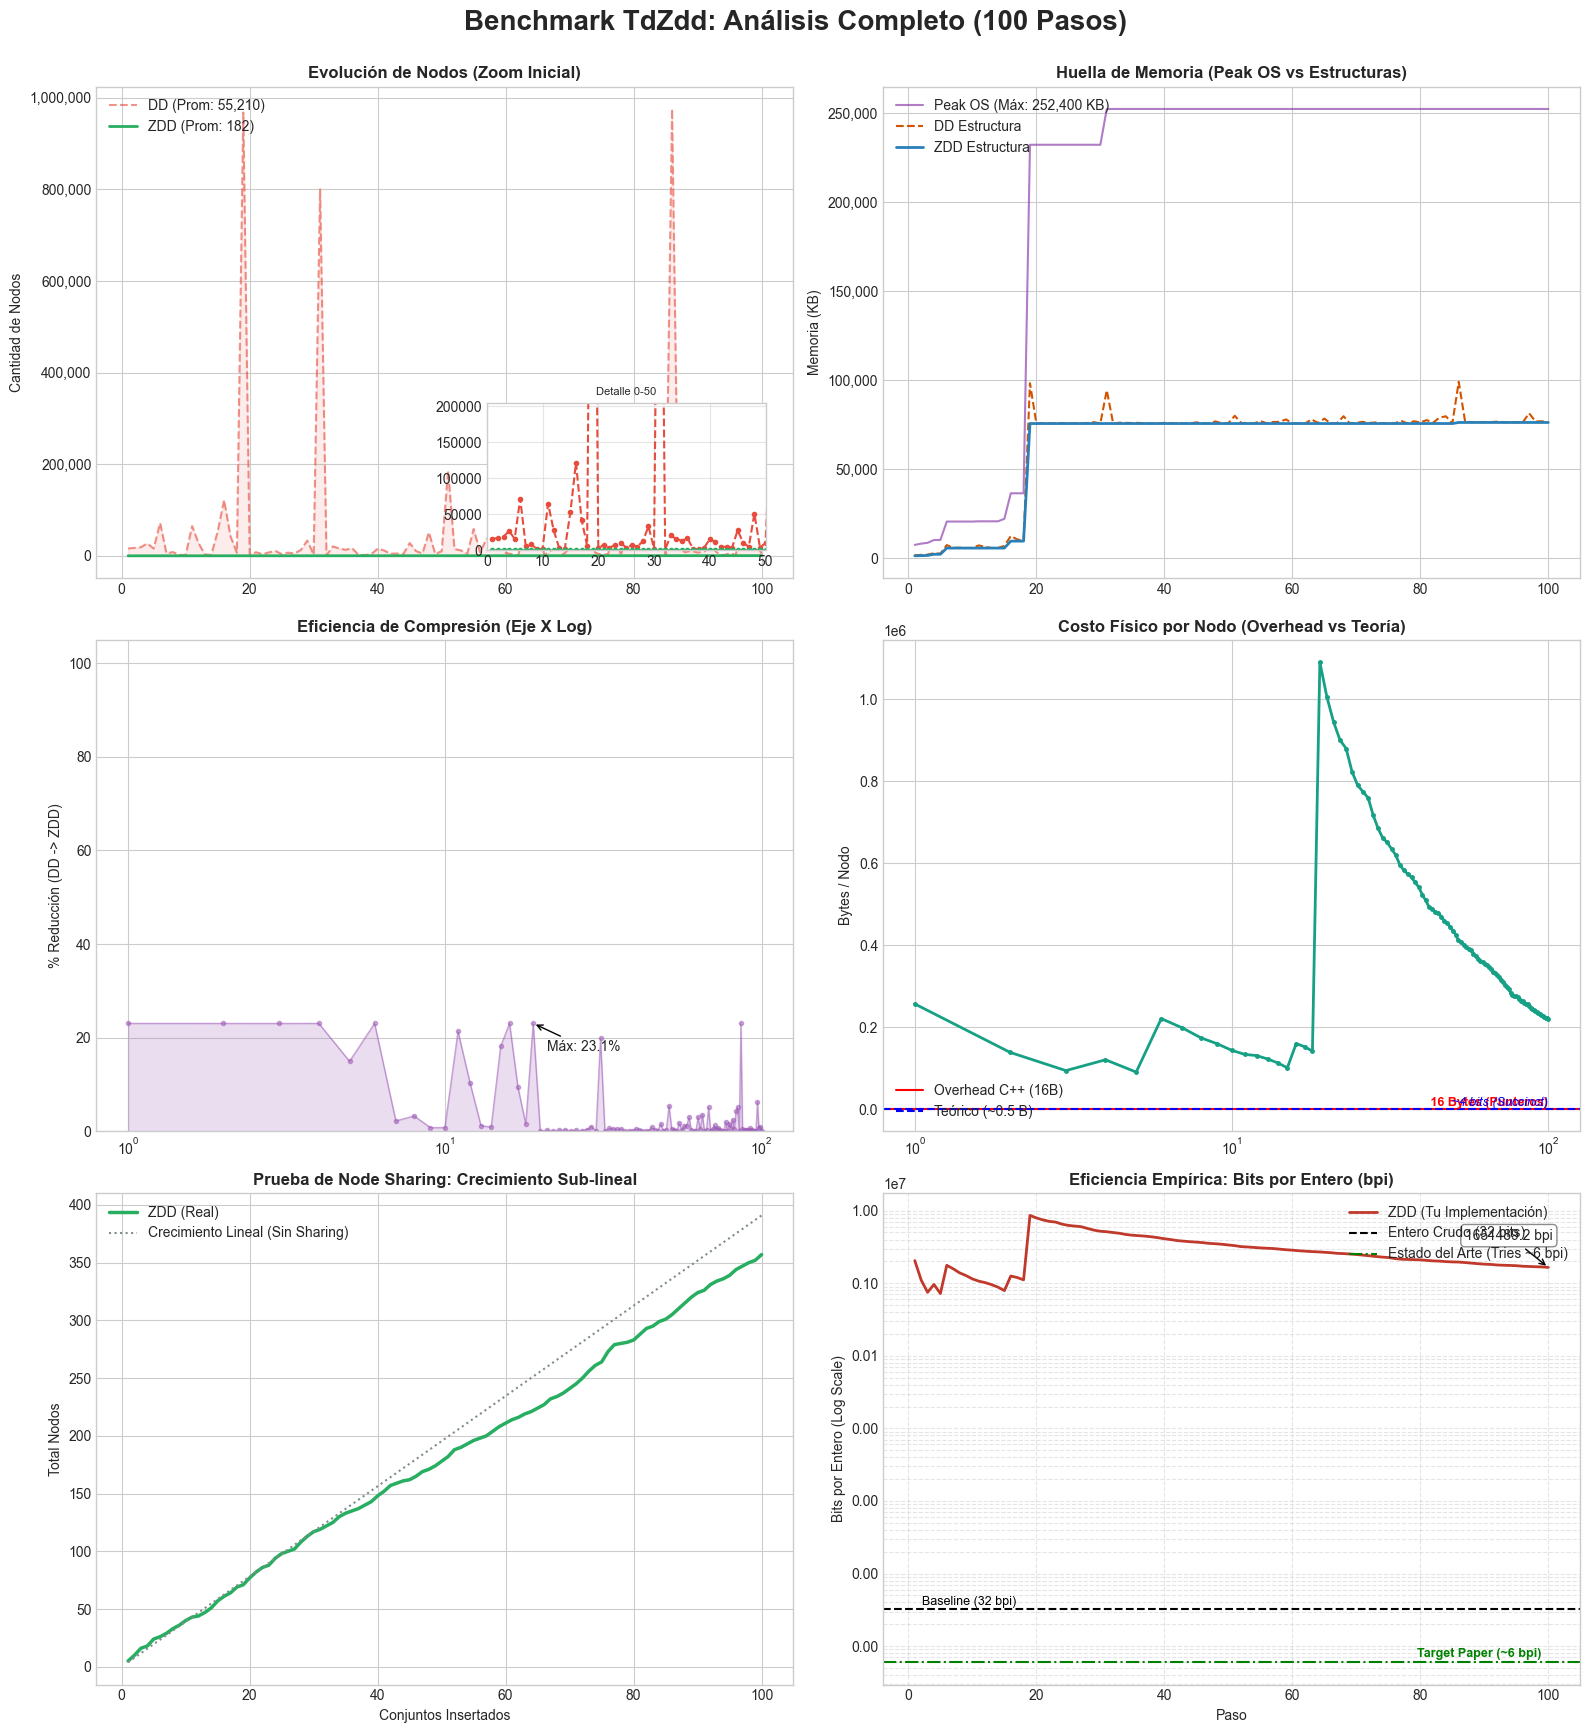

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
import numpy as np
import struct

# ==============================================================================
# 1. CONFIGURACIÓN
# ==============================================================================
OUTPUT_DIR = "resultados_test/"
CSV_FILE = "1mq_mini_100.csv"          # <--- Tu log de C++
BINARY_FILE = "archivos_test/1mq_mini_100.bin" # <--- Tu archivo PISA

CSV_PATH = os.path.join(OUTPUT_DIR, CSV_FILE)

if not os.path.exists(CSV_PATH):
    print(f"Error: No se encontró el CSV: {CSV_PATH}")
    exit()

if not os.path.exists(BINARY_FILE):
    print(f"Error: No se encontró el Binario: {BINARY_FILE}")
    exit()

print(f"--- INICIO ANÁLISIS ---")
print(f"Leyendo Log C++: {CSV_FILE}")
df = pd.read_csv(CSV_PATH)

# ==============================================================================
# 2. LECTURA DEL BINARIO PISA (Para calcular Total_Ints real y alinear)
# ==============================================================================
print(f"Leyendo Estructura Binaria PISA: {BINARY_FILE}")

counts = [] # Almacena la suma acumulada de enteros paso a paso
total_enteros_acumulado = 0

try:
    with open(BINARY_FILE, 'rb') as f:
        # 1. Leer Cabecera Global
        header_data = f.read(4)
        if not header_data: raise Exception("Archivo vacío")
        num_listas = struct.unpack('<I', header_data)[0]
        print(f" -> Cabecera PISA indica: {num_listas} listas.")

        # 2. Recorrer el archivo rápidamente (saltando datos)
        for i in range(num_listas):
            len_data = f.read(4)
            if not len_data: break
            n = struct.unpack('<I', len_data)[0]
            total_enteros_acumulado += n
            counts.append(total_enteros_acumulado)
            f.seek(n * 4, 1)

    print(f" -> Lectura completada. Total enteros en dataset: {total_enteros_acumulado:,}")

except Exception as e:
    print(f"ERROR CRÍTICO leyendo binario: {e}")
    exit()

# ==============================================================================
# 3. CÁLCULO DE MÉTRICAS
# ==============================================================================

# A. Mapear 'Paso' a 'Total_Ints' (Alineación exacta)
def get_total_ints(paso):
    idx = int(paso) - 1 
    if 0 <= idx < len(counts):
        return counts[idx]
    return np.nan 

df['Total_Ints'] = df['Paso'].apply(get_total_ints)
if df['Total_Ints'].isnull().any():
    df['Total_Ints'] = df['Total_Ints'].interpolate(method='linear')

# B. BITS PER INTEGER (bpi)
df['bpi'] = np.where(df['Total_Ints'] > 0, 
                     (df['Bytes_ZDD'] * 8) / df['Total_Ints'], 0)

# C. Porcentaje de Reducción
df['Reduccion_Pct'] = np.where(df['Bytes_DD'] > 0, 
                               ((df['Bytes_DD'] - df['Bytes_ZDD']) / df['Bytes_DD']) * 100, 0)

# D. Bytes por Nodo
df['Bytes_Por_Nodo'] = np.where(df['Nodos_ZDD'] > 0, 
                                df['Bytes_ZDD'] / df['Nodos_ZDD'], 0)

# ==============================================================================
# 4. GRAFICACIÓN (Estilo Completo Restaurado)
# ==============================================================================
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('ggplot')

# Colores
C_DD, C_ZDD = '#e74c3c', '#27ae60'
C_MEM_DD, C_MEM_Z = '#d35400', '#2980b9'
C_PEAK, C_EFF, C_DENS, C_THEORY, C_BPI = '#8e44ad', '#9b59b6', '#16a085', '#7f8c8d', '#c0392b'

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle(f'Benchmark TdZdd: Análisis Completo ({len(df)} Pasos)', fontsize=20, fontweight='bold', y=0.99)
fmt_miles = ticker.StrMethodFormatter('{x:,.0f}')

# Cálculos para leyendas
avg_nodos_dd = df['Nodos_DD'].mean()
avg_nodos_zdd = df['Nodos_ZDD'].mean()
max_peak = df['Peak_Mem_KB'].max()
pasos_zoom = int(min(100, len(df) * 0.5))

# --- GRÁFICO 1: EVOLUCIÓN DE NODOS ---
ax1 = axs[0, 0]
ax1.plot(df['Paso'], df['Nodos_DD'], label=f'DD (Prom: {avg_nodos_dd:,.0f})', color=C_DD, linestyle='--', alpha=0.6)
ax1.plot(df['Paso'], df['Nodos_ZDD'], label=f'ZDD (Prom: {avg_nodos_zdd:,.0f})', color=C_ZDD, linewidth=2)
ax1.fill_between(df['Paso'], df['Nodos_DD'], df['Nodos_ZDD'], color=C_DD, alpha=0.1)
ax1.set_title('Evolución de Nodos (Zoom Inicial)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cantidad de Nodos')
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(fmt_miles)

# Zoom Inset
axins1 = inset_axes(ax1, width="40%", height="30%", loc='lower right', borderpad=2)
axins1.plot(df['Paso'], df['Nodos_DD'], color=C_DD, linestyle='--', marker='.')
axins1.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, marker='.')
axins1.set_xlim(0, pasos_zoom) 
axins1.set_ylim(0, df['Nodos_DD'].iloc[pasos_zoom] * 1.1) 
axins1.grid(True, alpha=0.5)
axins1.set_title(f"Detalle 0-{pasos_zoom}", fontsize=8)

# --- GRÁFICO 2: MEMORIA ---
ax2 = axs[0, 1]
ax2.plot(df['Paso'], df['Peak_Mem_KB'], label=f'Peak OS (Máx: {max_peak:,.0f} KB)', 
         color=C_PEAK, linestyle='-', linewidth=1.5, alpha=0.7)
ax2.plot(df['Paso'], df['Bytes_DD']/1024, label='DD Estructura', color=C_MEM_DD, linestyle='--')
ax2.plot(df['Paso'], df['Bytes_ZDD']/1024, label='ZDD Estructura', color=C_MEM_Z, linewidth=2)
ax2.set_title('Huella de Memoria (Peak OS vs Estructuras)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Memoria (KB)')
ax2.legend(loc='upper left')
ax2.yaxis.set_major_formatter(fmt_miles)

# --- GRÁFICO 3: EFICIENCIA REDUCCIÓN ---
ax3 = axs[1, 0]
ax3.semilogx(df['Paso'], df['Reduccion_Pct'], color=C_EFF, linewidth=1, marker='o', markersize=3, alpha=0.5)
ax3.fill_between(df['Paso'], df['Reduccion_Pct'], color=C_EFF, alpha=0.2)
ax3.set_title('Eficiencia de Compresión (Eje X Log)', fontsize=12, fontweight='bold')
ax3.set_ylabel('% Reducción (DD -> ZDD)')
ax3.set_ylim(0, 105)
max_eff = df['Reduccion_Pct'].max()
max_eff_idx = df['Reduccion_Pct'].idxmax()
ax3.annotate(f'Máx: {max_eff:.1f}%', xy=(df['Paso'].iloc[max_eff_idx], max_eff), 
             xytext=(10, -20), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

# --- GRÁFICO 4: COSTO FÍSICO POR NODO ---
ax4 = axs[1, 1]
ax4.semilogx(df['Paso'], df['Bytes_Por_Nodo'], color=C_DENS, linewidth=2, marker='.', markersize=5)
ax4.axhline(y=16, color='r', linestyle='-', label='Overhead C++ (16B)')
ax4.text(df['Paso'].iloc[-1], 16.5, ' 16 Bytes (Punteros)', color='r', va='bottom', ha='right', fontsize=9, fontweight='bold')
ax4.axhline(y=0.5, color='blue', linestyle='--', label='Teórico (~0.5 B)')
ax4.text(df['Paso'].iloc[-1], 0.6, ' ~4 bits (Succinct)', color='blue', va='bottom', ha='right', fontsize=9, fontstyle='italic')
ax4.set_title('Costo Físico por Nodo (Overhead vs Teoría)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Bytes / Nodo')
ax4.legend(loc='lower left')

# --- GRÁFICO 5: SUBLINEALIDAD ---
ax5 = axs[2, 0]
base_idx = min(10, len(df)-1)
slope = df['Nodos_ZDD'].iloc[base_idx] / df['Paso'].iloc[base_idx] if base_idx > 0 else 1
linear_proj = df['Paso'] * slope
ax5.plot(df['Paso'], df['Nodos_ZDD'], color=C_ZDD, linewidth=2.5, label='ZDD (Real)')
ax5.plot(df['Paso'], linear_proj, color=C_THEORY, linestyle=':', label='Crecimiento Lineal (Sin Sharing)')
ax5.set_title('Prueba de Node Sharing: Crecimiento Sub-lineal', fontsize=12, fontweight='bold')
ax5.set_ylabel('Total Nodos')
ax5.set_xlabel('Conjuntos Insertados')
ax5.legend()
ax5.yaxis.set_major_formatter(fmt_miles)

# --- GRÁFICO 6: BPI (Bits Per Integer) ---
ax6 = axs[2, 1]
ax6.semilogy(df['Paso'], df['bpi'], color=C_BPI, linewidth=2, label='ZDD (Tu Implementación)')
ax6.axhline(y=32, color='black', linestyle='--', linewidth=1.5, label='Entero Crudo (32 bits)')
ax6.text(df['Paso'].iloc[0], 34, '  Baseline (32 bpi)', color='black', va='bottom', fontsize=9)
ax6.axhline(y=6, color='green', linestyle='-.', linewidth=1.5, label='Estado del Arte (Tries ~6 bpi)')
ax6.text(df['Paso'].iloc[-1], 6.5, 'Target Paper (~6 bpi)  ', color='green', va='bottom', ha='right', fontsize=9, fontweight='bold')

ax6.set_title('Eficiencia Empírica: Bits por Entero (bpi)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Bits por Entero (Log Scale)')
ax6.set_xlabel('Paso')
ax6.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax6.grid(True, which='both', linestyle='--', alpha=0.5)
ax6.legend(loc='upper right')

final_bpi = df['bpi'].iloc[-1]
msg_bpi = f"{final_bpi:.1f} bpi"
ax6.annotate(msg_bpi, 
             xy=(df['Paso'].iloc[-1], final_bpi), 
             xytext=(-60, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.9))

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()